<a href="https://colab.research.google.com/github/dmahoner/472_WS_SAF/blob/main/Workshop3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Data Loading

In [ ]:
import pandas as pd

# Replace '/path/to/your/file.xlsx' with the actual file path
file_path = '/content/SAF Dataset.xlsx'

# Load the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame

print(df.head())

       C (%)      H (%)     N (%)      O (%)     S (%)     VM (%)    Ash (%)  \
0  53.041259   6.390897  0.871969  39.366227  0.329647  82.070081   4.884097   
1  52.846674   6.186584  0.436866  40.219842  0.310034  70.783562  12.000000   
2  40.020000   6.010000  0.880000  52.860000  0.230000  72.294705  10.020831   
3  45.739910  10.762332  7.036909  34.908589  1.552259  49.357766  42.020000   
4  44.480000   6.280000  8.210000  40.490000  0.540000  77.497780   6.472025   

      FC (%)    Cel (%)    Hem (%)    Lig (%) Location   \
0  13.045822  37.260000  14.620000  31.680000        US   
1  17.216438  31.300000  24.300000  14.100000        US   
2  17.684464  35.000000  27.500000  10.000000        US   
3   8.626970  35.000000  25.000000  26.500000        US   
4  16.030195  22.775726  55.419525   2.955145        US   

   Plant capacity (kg/hr)   MSP  
0                   25000  0.64  
1                   25000  0.63  
2                   25000  0.69  
3                   25000  0

Checking for missing Data

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Print the results
print("Missing values in each column:")
print(missing_values)

# Replace missing values with the mean value (for numeric columns only)
for col in df.select_dtypes(include=['int64', 'float64']): # Iterate over numeric columns only
    df[col].fillna(df[col].mean(), inplace=True)

Missing values in each column:
C (%)                     0
H (%)                     0
N (%)                     0
O (%)                     0
S (%)                     0
VM (%)                    0
Ash (%)                   0
FC (%)                    0
Cel (%)                   0
Hem (%)                   0
Lig (%)                   0
Location                  0
Plant capacity (kg/hr)    0
MSP                       0
dtype: int64


In [ ]:
# prompt: write code to remove rows of missing data

# Remove rows with any missing values
df.dropna(inplace=True)

# Display the DataFrame after removing rows with missing values
print(df.head())


        C (%)     H (%)     N (%)      O (%)  S (%)     VM (%)   Ash (%)  \
7   45.896172  5.709845  1.622249  46.771734    0.0  77.318919  1.783784   
9   47.649030  6.174469  0.619478  45.557022    0.0  72.950000  1.540000   
10  47.649030  6.174469  0.619478  45.557022    0.0  72.950000  1.540000   
13  47.100000  6.500000  0.600000  45.800000    0.0  71.700000  1.700000   
16  50.520000  5.810000  0.230000  43.440000    0.0  87.828947  0.438596   

       FC (%)  Cel (%)  Hem (%)  Lig (%) Location   Plant capacity (kg/hr)  \
7   20.897297    21.00    12.80     32.7        US                   25000   
9   25.510000    29.01    41.24     22.4        US                   25000   
10  25.510000    29.01    41.24     22.4        US                   25000   
13  26.600000    39.20    22.40     25.2        US                   25000   
16  11.732456    45.00    25.00     25.0        US                   25000   

     MSP  
7   0.73  
9   0.75  
10  0.75  
13  0.67  
16  0.69  


Step 3: Handling Outliers

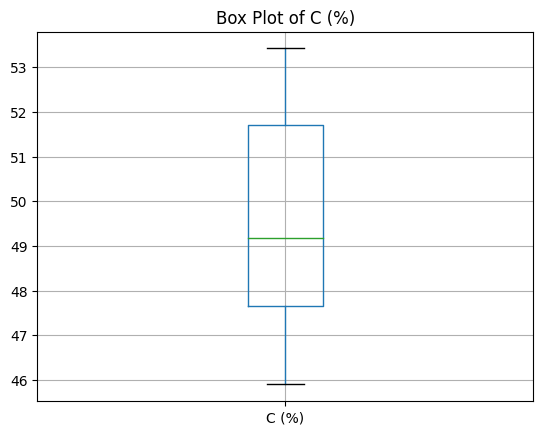

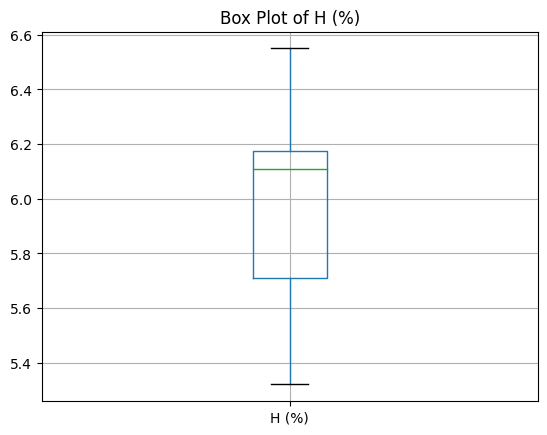

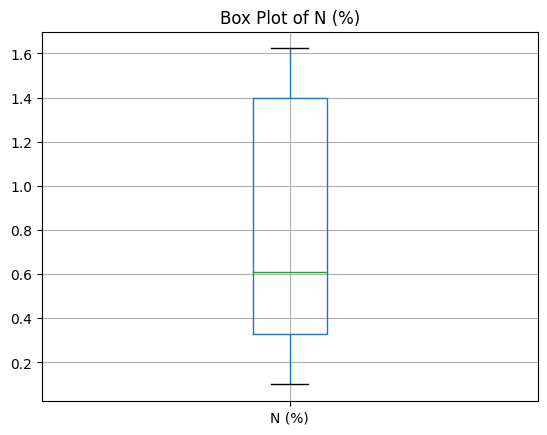

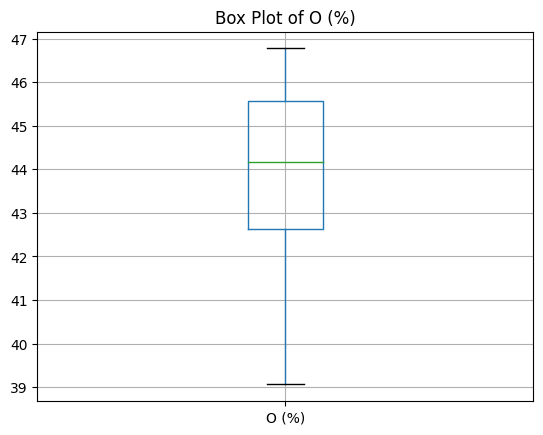

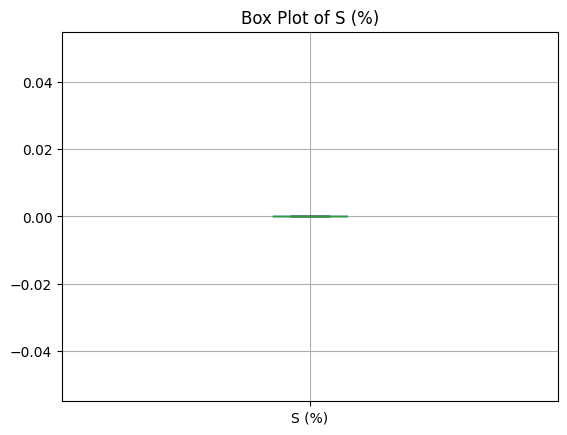

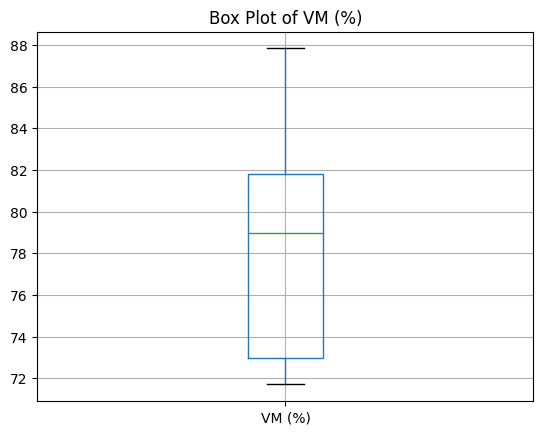

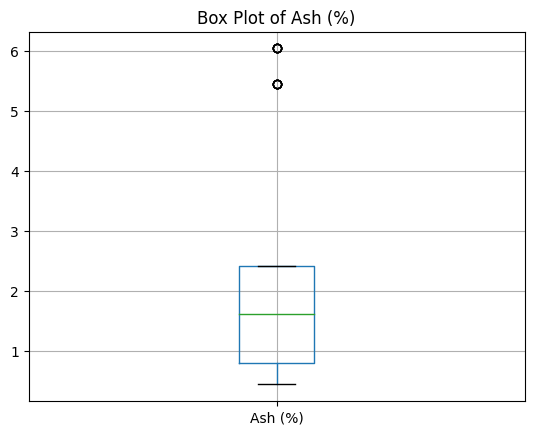

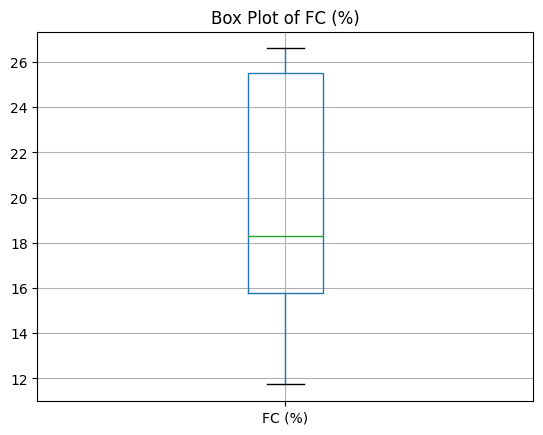

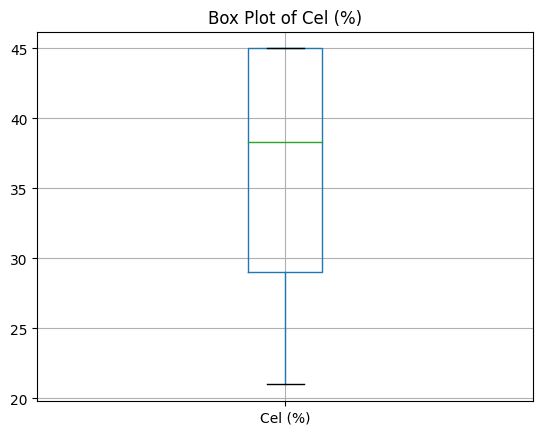

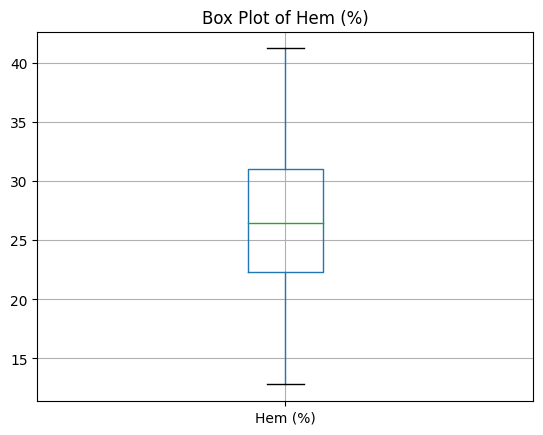

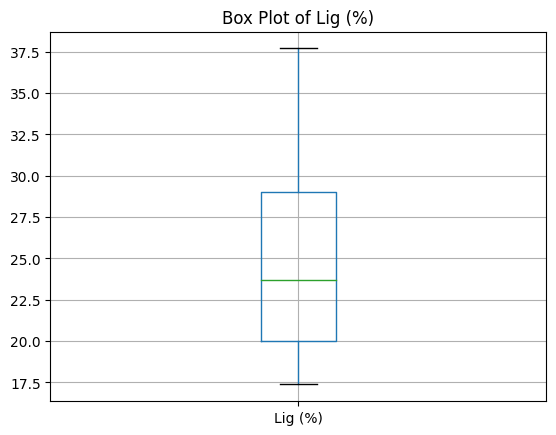

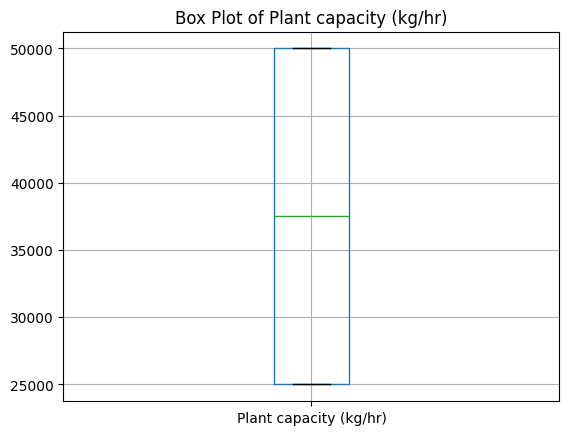

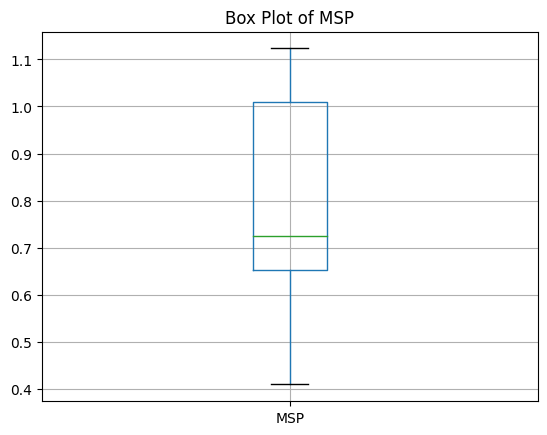

In [ ]:
# prompt: perform a visual analysis to spot outliers in columns

import matplotlib.pyplot as plt

# Select numerical columns for outlier analysis
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create box plots to visualize outliers
for col in numeric_cols:
  plt.figure()
  df.boxplot(column=col)
  plt.title(f'Box Plot of {col}')
  plt.show()


In [ ]:
# prompt: write code to get rid of the outliers

# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function to each numerical column
for col in numeric_cols:
  df = remove_outliers_iqr(df, col)


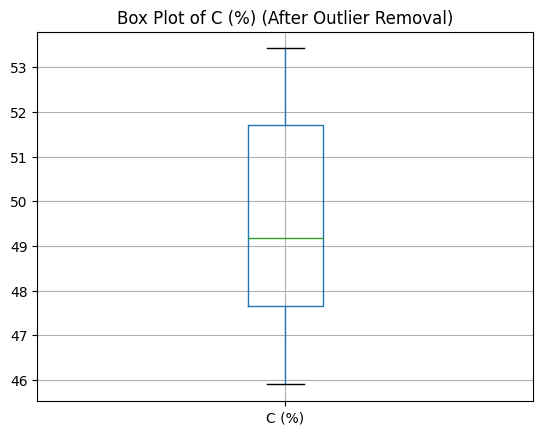

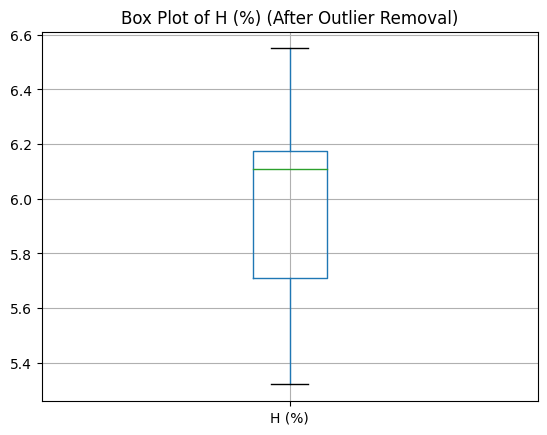

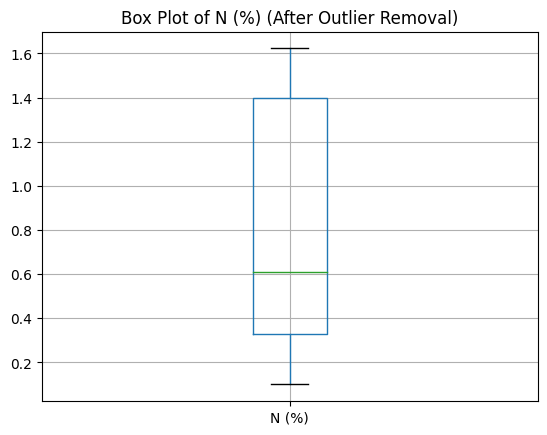

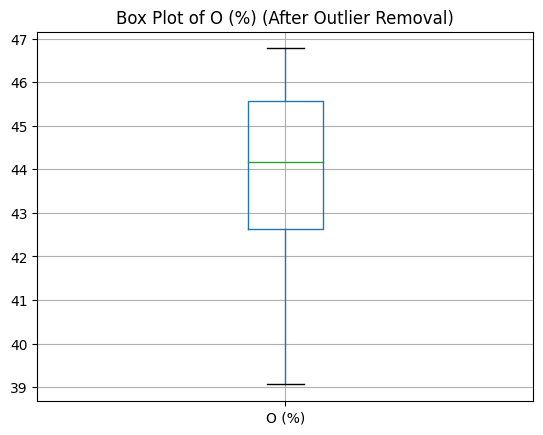

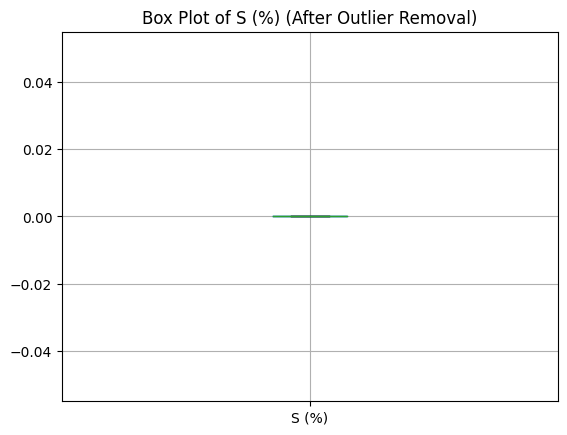

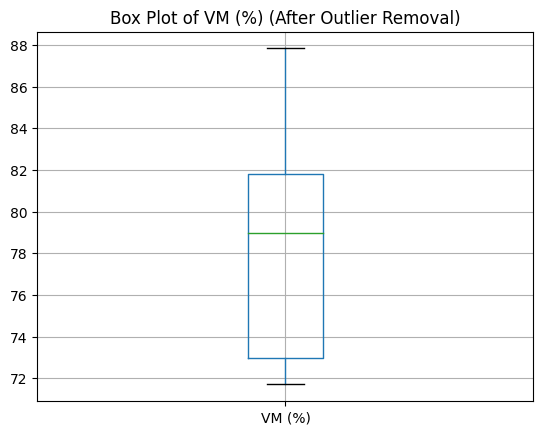

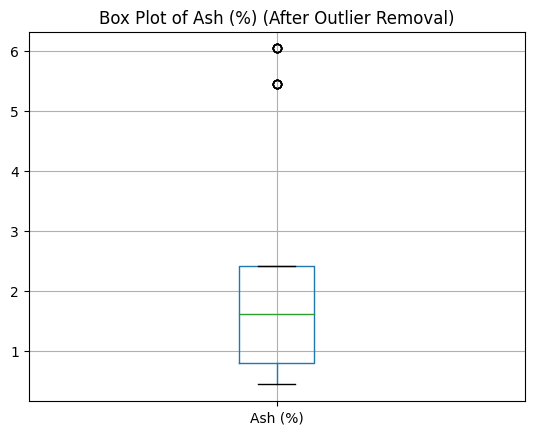

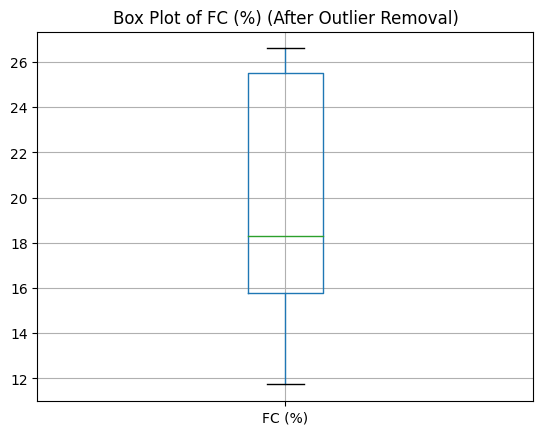

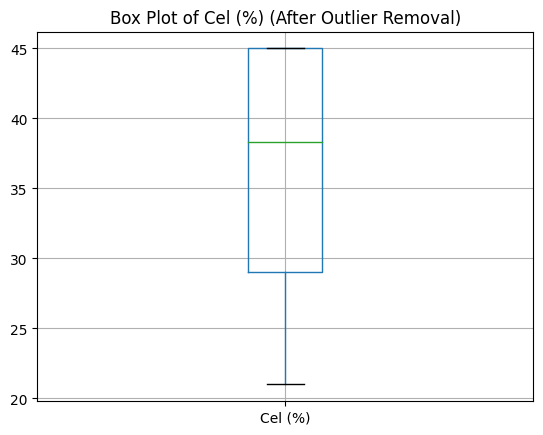

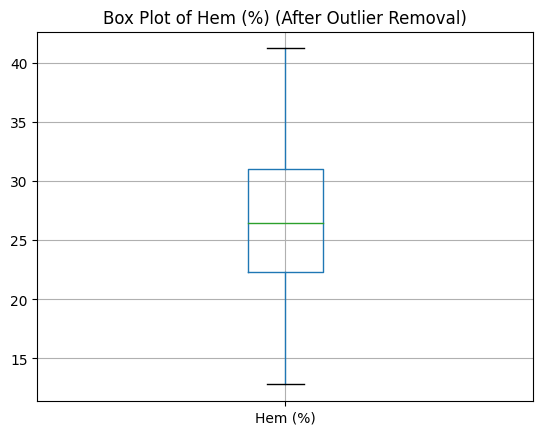

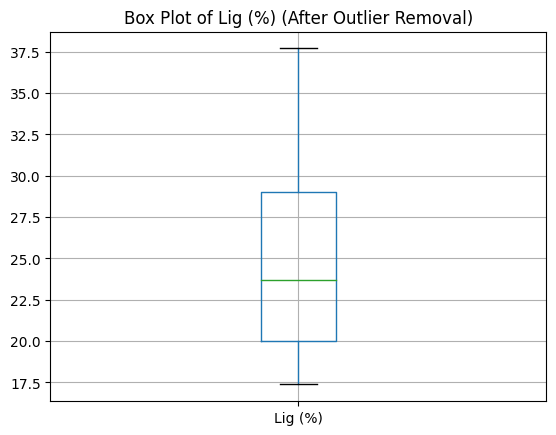

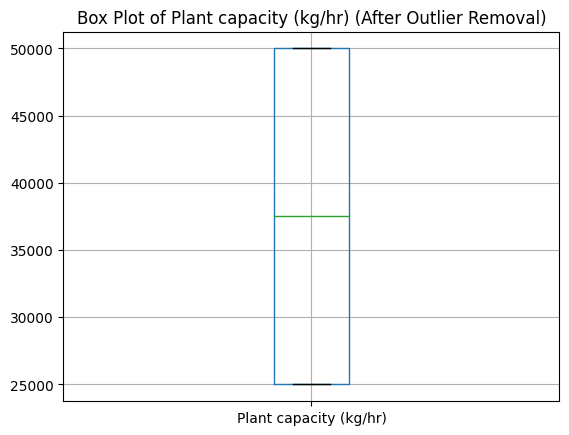

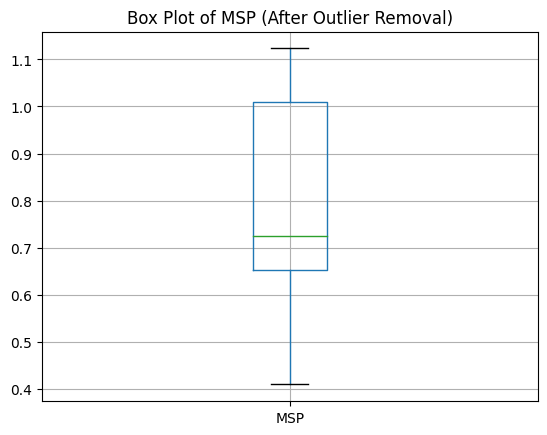

In [ ]:
# prompt: plot new modified data with out outliers

import matplotlib.pyplot as plt
# Select numerical columns for outlier analysis
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create box plots to visualize outliers after outlier removal
for col in numeric_cols:
  plt.figure()
  df.boxplot(column=col)
  plt.title(f'Box Plot of {col} (After Outlier Removal)')
  plt.show()


Step: 4 Summary Statistics

In [ ]:
# prompt: calculate the mean, median, standard deviation, min, mas, IQR and display it in a table

# Calculate summary statistics
summary_stats = df.describe()

# Transpose the table for better readability
summary_stats = summary_stats.transpose()

# Calculate IQR
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']

# Display the table
print(summary_stats[['mean', '50%', 'std', 'min', 'max', 'IQR']])


                                mean           50%           std  \
C (%)                      49.103029     48.374515      2.373082   
H (%)                       5.917348      5.955000      0.366365   
N (%)                       0.571401      0.525000      0.440721   
O (%)                      44.408222     45.228511      1.923135   
S (%)                       0.000000      0.000000      0.000000   
VM (%)                     78.486713     78.959459      5.413932   
Ash (%)                     1.343889      1.540000      0.652263   
FC (%)                     20.169399     19.748649      5.099347   
Cel (%)                    36.040000     38.350000      8.308602   
Hem (%)                    27.997500     26.500000      9.203273   
Lig (%)                    26.800000     25.100000      5.640507   
Plant capacity (kg/hr)  37500.000000  37500.000000  12632.278816   
MSP                         0.778388      0.734200      0.220033   

                                 min           

Step 5: One: Hot Encoding for categorical variables

In [ ]:
# prompt: write code to identify the data types present

# Get data types of each column
data_types = df.dtypes

# Print the data types
print("Data types of each column:")
print(data_types)


Data types of each column:
C (%)                     float64
H (%)                     float64
N (%)                     float64
O (%)                     float64
S (%)                     float64
VM (%)                    float64
Ash (%)                   float64
FC (%)                    float64
Cel (%)                   float64
Hem (%)                   float64
Lig (%)                   float64
Location                   object
Plant capacity (kg/hr)      int64
MSP                       float64
dtype: object


In [ ]:
import pandas as pd

def one_hot_encode(file_path):
  """Converts categorical variables in an Excel file to numerical using one-hot encoding.

  Args:
    file_path: The path to the Excel file.

  Returns:
    The DataFrame with categorical variables one-hot encoded.
  """

  df = pd.read_excel(file_path)

  # Identify categorical columns (assuming object dtype)
  categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

  # Apply one-hot encoding
  df_encoded = pd.get_dummies(df, columns=categorical_cols)

  return df_encoded

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'
df_encoded = one_hot_encode(file_path)

print(df_encoded)

         C (%)      H (%)     N (%)      O (%)     S (%)     VM (%)  \
0    53.041259   6.390897  0.871969  39.366227  0.329647  82.070081   
1    52.846674   6.186584  0.436866  40.219842  0.310034  70.783562   
2    40.020000   6.010000  0.880000  52.860000  0.230000  72.294705   
3    45.739910  10.762332  7.036909  34.908589  1.552259  49.357766   
4    44.480000   6.280000  8.210000  40.490000  0.540000  77.497780   
..         ...        ...       ...        ...       ...        ...   
181  50.840673   5.904724  0.300240  42.934347  0.020016  85.300000   
182  52.036199   6.979295  3.551351  36.295077  1.138078  57.460000   
183  53.200000   6.100000  0.100000  40.600000  0.000000  80.600000   
184  55.235524   5.890589  1.580158  37.293729  0.000000  84.041451   
185  60.460000   9.080000  3.100000  27.360000  0.000000  85.683987   

       Ash (%)     FC (%)    Cel (%)    Hem (%)    Lig (%)  \
0     4.884097  13.045822  37.260000  14.620000  31.680000   
1    12.000000  17.2164

Step 6: Checking for redundant columns

In [ ]:
import pandas as pd

def identify_constant_columns(file_path):
  """Identifies columns with constant values across all rows in an Excel file.

  Args:
    file_path: The path to the Excel file.

  Returns:
    A list of column names that have constant values.
  """

  df = pd.read_excel(file_path)

  # Check if each column has only one unique value
  constant_columns = df.columns[(df.nunique() == 1)]

  return constant_columns

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'
constant_cols = identify_constant_columns(file_path)

print("Columns with constant values:", constant_cols)

Columns with constant values: Index([], dtype='object')


In [ ]:
import pandas as pd

def identify_duplicate_columns(file_path):
  """Identifies columns with duplicated information in an Excel file.

  Args:
    file_path: The path to the Excel file.

  Returns:
    A list of column names with duplicated information.
  """

  df = pd.read_excel(file_path)

  duplicate_columns = []
  for column in df.columns:
    if df[column].duplicated().sum() > 0:
      duplicate_columns.append(column)

  return duplicate_columns

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'
duplicate_cols = identify_duplicate_columns(file_path)

print("Columns with duplicated information:", duplicate_cols)

Columns with duplicated information: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)', 'Cel (%)', 'Hem (%)', 'Lig (%)', 'Location ', 'Plant capacity (kg/hr)', 'MSP']


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

def determine_relevance_without_target(file_path):
  """Determines relevance of columns without a target variable.

  Args:
    file_path: The path to the Excel file.

  Returns:
    A list of tuples containing column names and their corresponding feature importance scores.
  """

  df = pd.read_excel(file_path)

  # Handle categorical variables using Label Encoding
  for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is categorical
      le = LabelEncoder()
      df[col] = le.fit_transform(df[col])

  # Create a random forest classifier
  clf = RandomForestClassifier()

  # Fit the classifier to the data (using all columns as features)
  # Use a dummy target variable with the same number of rows as df
  clf.fit(df, [0] * len(df))

  # Get feature importance scores
  feature_importances = clf.feature_importances_

  # Sort the feature importance scores in descending order
  sorted_importances = sorted(zip(df.columns, feature_importances), key=lambda x: x[1], reverse=True)

  return sorted_importances

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'

relevance_scores = determine_relevance_without_target(file_path)

print("Relevance scores:")
for column, score in relevance_scores:
  print(f"{column}: {score}")

Relevance scores:
H (%): 0.0
N (%): 0.0
O (%): 0.0
S (%): 0.0
VM (%): 0.0
Ash (%): 0.0
FC (%): 0.0
Cel (%): 0.0
Hem (%): 0.0
Lig (%): 0.0
Location : 0.0
Plant capacity (kg/hr): 0.0
MSP: 0.0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def identify_irrelevant_columns(file_path, target_column=None):
  """Identifies potentially irrelevant columns based on correlation and redundancy.

  Args:
    file_path: The path to the Excel file.
    target_column: The name of the target column for correlation analysis (optional).

  Returns:
    A list of column names that might be considered irrelevant.
  """

  df = pd.read_excel(file_path)

  # Convert columns to numeric if possible, otherwise exclude them from correlation analysis
  for col in df.columns:
    try:
      df[col] = pd.to_numeric(df[col])
    except ValueError:
      print(f"Column {col} could not be converted to numeric and will be excluded from correlation analysis.")
      df = df.drop(col, axis=1) # Drop the column causing the error

  # Check for correlation with the target variable (if provided)
  irrelevant_columns = [] # initialize irrelevant_columns
  if target_column:
    if target_column in df.columns: # Check if the target column still exists
      correlation_matrix = df.corr()[target_column]
      irrelevant_columns = correlation_matrix[correlation_matrix.abs() < threshold].index.tolist()  # Adjust threshold as needed
    else:
      print(f"Target column '{target_column}' not found in DataFrame - may have been dropped due to non-numeric values.")

  # Check for redundant columns based on correlation matrix
  correlation_matrix = df.corr()
  redundant_columns = []
  for i in range(len(correlation_matrix)):
    for j in range(i+1, len(correlation_matrix)):
      if correlation_matrix.iloc[i, j] > threshold:
        redundant_columns.append(correlation_matrix.columns[j])

  # Combine irrelevant and redundant columns
  irrelevant_columns = list(set(irrelevant_columns + redundant_columns))

  return irrelevant_columns

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'
# Set the target column if applicable
target_column = 'MSP'  # Replace with your actual target column name
threshold = .1 # Added threshold

irrelevant_cols = identify_irrelevant_columns(file_path, target_column)

print("Potentially irrelevant columns:", irrelevant_cols)

Column Location  could not be converted to numeric and will be excluded from correlation analysis.
Potentially irrelevant columns: ['Hem (%)', 'Lig (%)', 'O (%)', 'S (%)', 'Cel (%)', 'MSP', 'FC (%)', 'N (%)', 'H (%)', 'VM (%)', 'Ash (%)']


Step 7: correlation and Heatmaps

In [ ]:
import pandas as pd

def calculate_correlation_matrix(file_path):
  """Calculates the correlation matrix for a given Excel file.

  Args:
    file_path: The path to the Excel file.

  Returns:
    The calculated correlation matrix as a Pandas DataFrame.
  """

  df = pd.read_excel(file_path)

  # Convert columns to numeric if possible, otherwise exclude them
  for col in df.columns:
    try:
      df[col] = pd.to_numeric(df[col])
    except ValueError:
      print(f"Column {col} could not be converted to numeric and will be excluded from correlation analysis.")
      df = df.drop(col, axis=1)

  correlation_matrix = df.corr()

  return correlation_matrix

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'
correlation_matrix = calculate_correlation_matrix(file_path)

print(correlation_matrix)

Column Location  could not be converted to numeric and will be excluded from correlation analysis.
                               C (%)         H (%)         N (%)  \
C (%)                   1.000000e+00  1.264528e-01 -3.271896e-02   
H (%)                   1.264528e-01  1.000000e+00  5.730386e-01   
N (%)                  -3.271896e-02  5.730386e-01  1.000000e+00   
O (%)                  -8.070651e-01 -5.717483e-01 -5.327822e-01   
S (%)                   3.468611e-02  5.934591e-01  7.221800e-01   
VM (%)                  2.370645e-01 -3.312851e-01 -3.815963e-01   
Ash (%)                -6.838875e-02  5.496854e-01  6.390202e-01   
FC (%)                 -2.348595e-01 -3.746149e-01 -4.406216e-01   
Cel (%)                -1.209621e-03 -8.987402e-02 -3.852100e-01   
Hem (%)                -1.974085e-01 -1.932930e-02  3.214638e-01   
Lig (%)                 1.708138e-01 -8.634971e-02 -3.705005e-01   
Plant capacity (kg/hr)  4.923250e-16 -1.866871e-15 -1.867358e-16   
MSP              

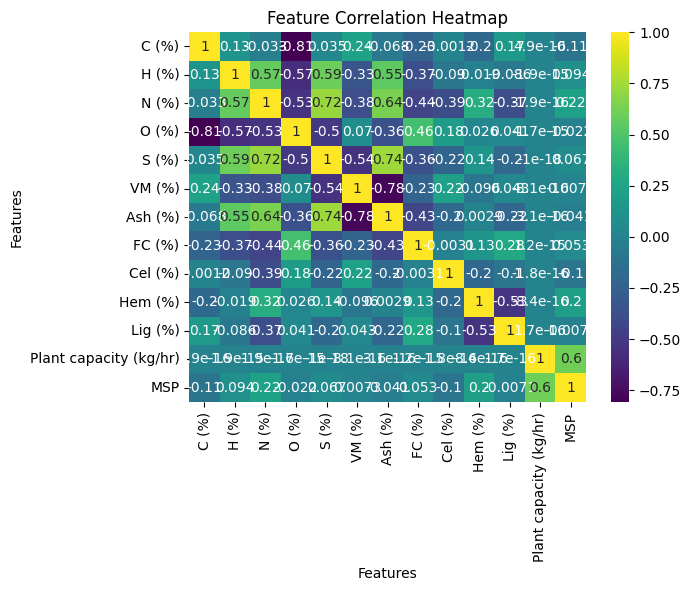

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_correlation_heatmap(file_path):
  """Creates a heatmap to visualize feature correlations in an Excel file.

  Args:
    file_path: The path to the Excel file.
  """

  df = pd.read_excel(file_path)

  # Calculate the correlation matrix
  # Include only numerical features for correlation calculation
  corr = df.select_dtypes(include=['number']).corr()

  # Create the heatmap
  sns.heatmap(corr, annot=True, cmap="viridis")

  # Set the title and labels
  plt.title("Feature Correlation Heatmap")
  plt.xlabel("Features")
  plt.ylabel("Features")

  # Show the plot
  plt.show()

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'
create_correlation_heatmap(file_path)

Step8: vizualizing Data Relationships

In [ ]:
import pandas as pd

def identify_continuous_data(file_path):
  """
  Identifies continuous data in an Excel file based on numerical formatting.

  Args:
    file_path: Path to the Excel file.

  Returns:
    A list of column names that contain continuous data.
  """

  df = pd.read_excel(file_path)

  continuous_columns = []
  for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
      continuous_columns.append(column)

  return continuous_columns

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'
continuous_columns = identify_continuous_data(file_path)

print("Continuous columns:", continuous_columns)


Continuous columns: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)', 'Cel (%)', 'Hem (%)', 'Lig (%)', 'Plant capacity (kg/hr)', 'MSP']


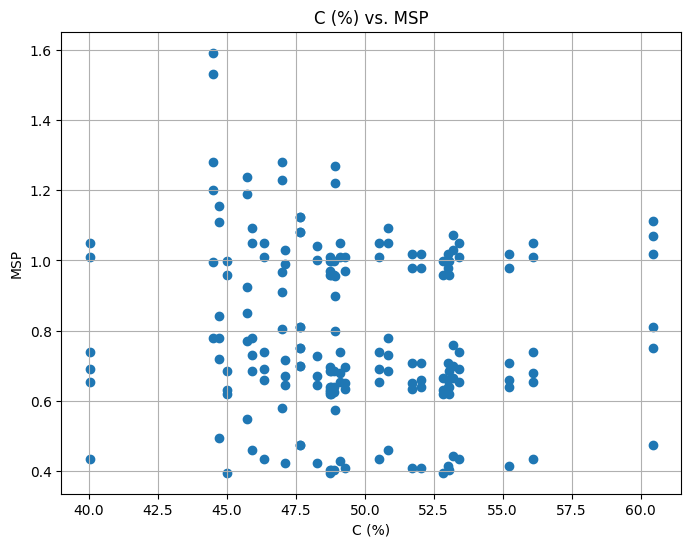

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def create_scatter_plot(file_path, x_column, y_column):
  """Creates a scatter plot for the specified columns in an Excel file.

  Args:
    file_path: The path to the Excel file.
    x_column: The name of the column for the x-axis.
    y_column: The name of the column for the y-axis.
  """

  df = pd.read_excel(file_path)

  plt.figure(figsize=(8, 6))
  plt.scatter(df[x_column], df[y_column])
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title(f"{x_column} vs. {y_column}")
  plt.grid(True)
  plt.show()

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'
# Specify the column names for the x-axis and y-axis
x_column = 'C (%)'  # Replace with your actual column name
y_column = 'MSP'  # Replace with your actual column name

create_scatter_plot(file_path, x_column, y_column)

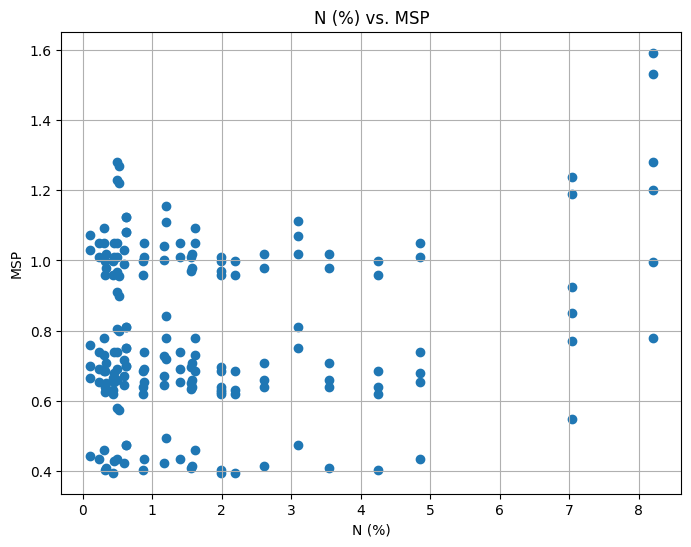

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def create_scatter_plot(file_path, x_column, y_column):
  """Creates a scatter plot for the specified columns in an Excel file.

  Args:
    file_path: The path to the Excel file.
    x_column: The name of the column for the x-axis.
    y_column: The name of the column for the y-axis.
  """

  df = pd.read_excel(file_path)

  plt.figure(figsize=(8, 6))
  plt.scatter(df[x_column], df[y_column])
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title(f"{x_column} vs. {y_column}")
  plt.grid(True)
  plt.show()

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'
# Specify the column names for the x-axis and y-axis
x_column = 'N (%)'  # Replace with your actual column name
y_column = 'MSP'  # Replace with your actual column name

create_scatter_plot(file_path, x_column, y_column)

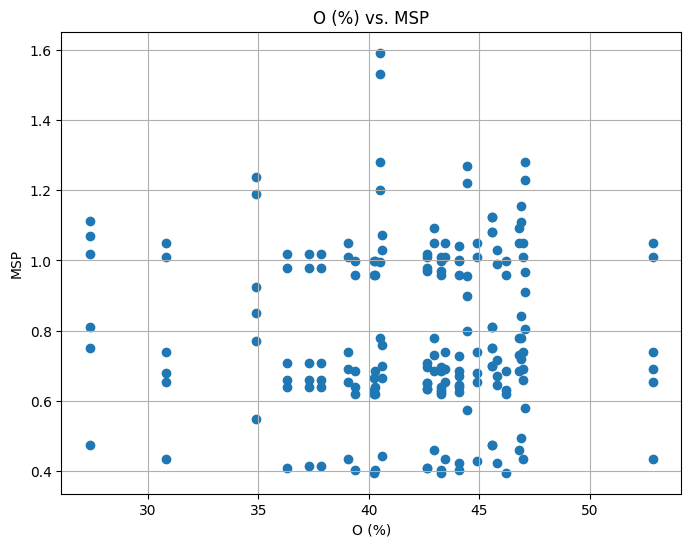

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def create_scatter_plot(file_path, x_column, y_column):
  """Creates a scatter plot for the specified columns in an Excel file.

  Args:
    file_path: The path to the Excel file.
    x_column: The name of the column for the x-axis.
    y_column: The name of the column for the y-axis.
  """

  df = pd.read_excel(file_path)

  plt.figure(figsize=(8, 6))
  plt.scatter(df[x_column], df[y_column])
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title(f"{x_column} vs. {y_column}")
  plt.grid(True)
  plt.show()

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'
# Specify the column names for the x-axis and y-axis
x_column = 'O (%)'  # Replace with your actual column name
y_column = 'MSP'  # Replace with your actual column name

create_scatter_plot(file_path, x_column, y_column)

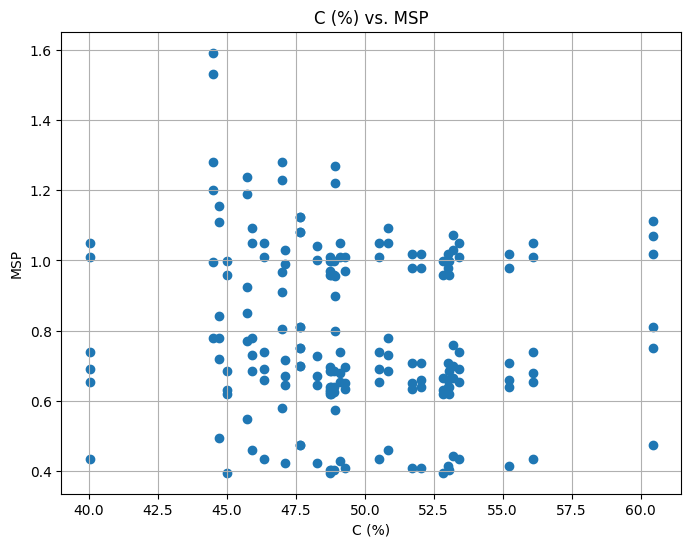

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def create_scatter_plot(file_path, x_column, y_column):
  """Creates a scatter plot for the specified columns in an Excel file.

  Args:
    file_path: The path to the Excel file.
    x_column: The name of the column for the x-axis.
    y_column: The name of the column for the y-axis.
  """

  df = pd.read_excel(file_path)

  plt.figure(figsize=(8, 6))
  plt.scatter(df[x_column], df[y_column])
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title(f"{x_column} vs. {y_column}")
  plt.grid(True)
  plt.show()

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'
# Specify the column names for the x-axis and y-axis
x_column = 'C (%)'  # Replace with your actual column name
y_column = 'MSP'  # Replace with your actual column name

create_scatter_plot(file_path, x_column, y_column)

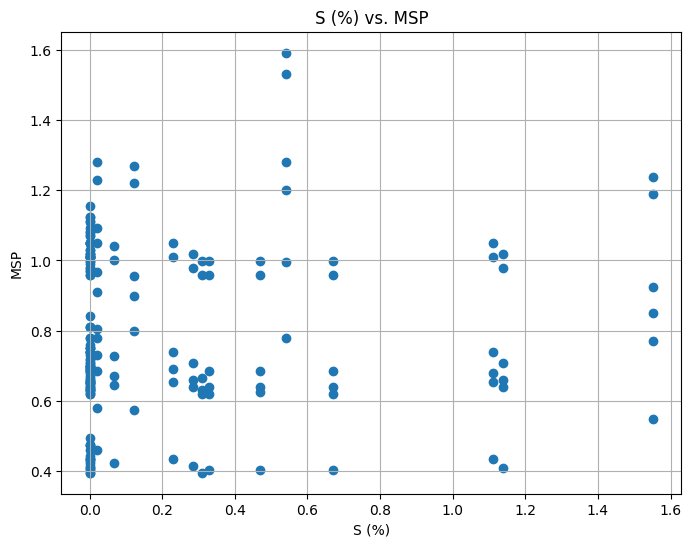

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def create_scatter_plot(file_path, x_column, y_column):
  """Creates a scatter plot for the specified columns in an Excel file.

  Args:
    file_path: The path to the Excel file.
    x_column: The name of the column for the x-axis.
    y_column: The name of the column for the y-axis.
  """

  df = pd.read_excel(file_path)

  plt.figure(figsize=(8, 6))
  plt.scatter(df[x_column], df[y_column])
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title(f"{x_column} vs. {y_column}")
  plt.grid(True)
  plt.show()

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'
# Specify the column names for the x-axis and y-axis
x_column = 'S (%)'  # Replace with your actual column name
y_column = 'MSP'  # Replace with your actual column name

create_scatter_plot(file_path, x_column, y_column)

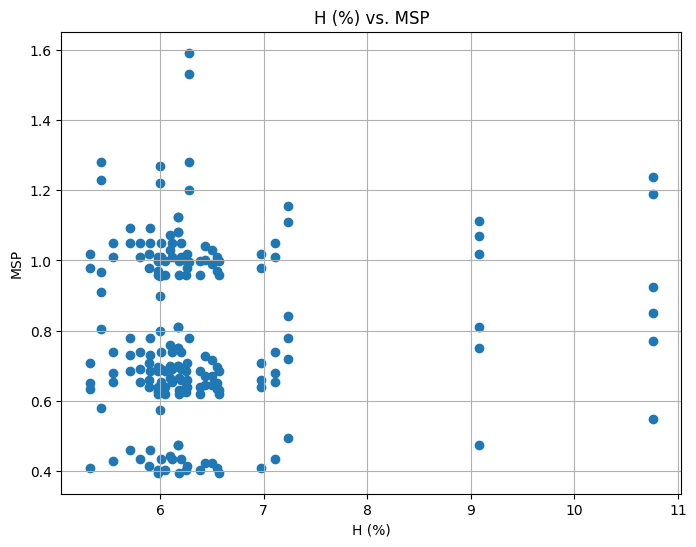

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def create_scatter_plot(file_path, x_column, y_column):
  """Creates a scatter plot for the specified columns in an Excel file.

  Args:
    file_path: The path to the Excel file.
    x_column: The name of the column for the x-axis.
    y_column: The name of the column for the y-axis.
  """

  df = pd.read_excel(file_path)

  plt.figure(figsize=(8, 6))
  plt.scatter(df[x_column], df[y_column])
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title(f"{x_column} vs. {y_column}")
  plt.grid(True)
  plt.show()

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'
# Specify the column names for the x-axis and y-axis
x_column = 'H (%)'  # Replace with your actual column name
y_column = 'MSP'  # Replace with your actual column name

create_scatter_plot(file_path, x_column, y_column)

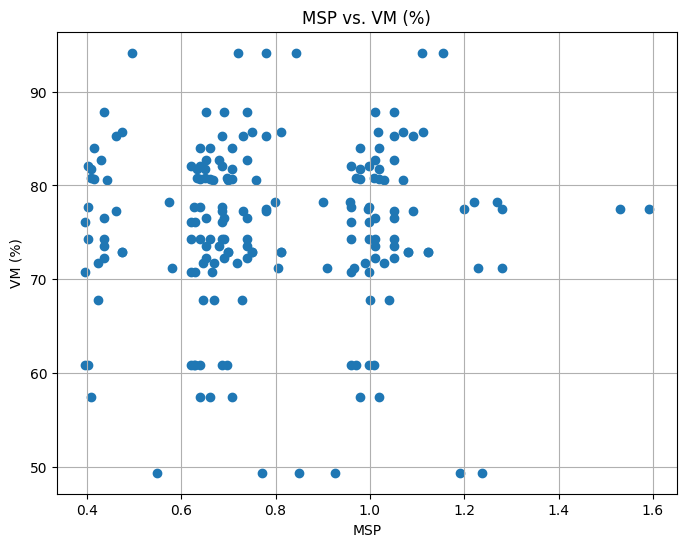

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def create_scatter_plot(file_path, x_column, y_column):
  """Creates a scatter plot for the specified columns in an Excel file.

  Args:
    file_path: The path to the Excel file.
    x_column: The name of the column for the x-axis.
    y_column: The name of the column for the y-axis.
  """

  df = pd.read_excel(file_path)

  plt.figure(figsize=(8, 6))
  plt.scatter(df[x_column], df[y_column])
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title(f"{x_column} vs. {y_column}")
  plt.grid(True)
  plt.show()

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'
# Specify the column names for the x-axis and y-axis
x_column = 'VM (%)'  # Replace with your actual column name
y_column = 'MSP'  # Replace with your actual column name

create_scatter_plot(file_path, x_column, y_column)

CReating

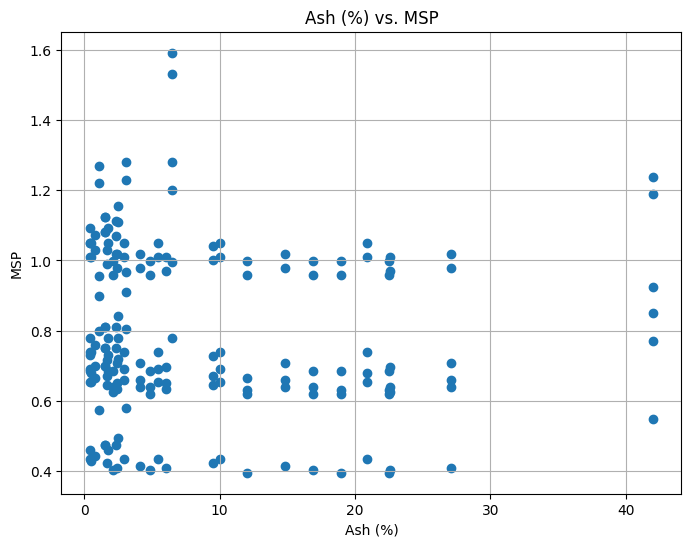

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def create_scatter_plot(file_path, x_column, y_column):
  """Creates a scatter plot for the specified columns in an Excel file.

  Args:
    file_path: The path to the Excel file.
    x_column: The name of the column for the x-axis.
    y_column: The name of the column for the y-axis.
  """

  df = pd.read_excel(file_path)

  plt.figure(figsize=(8, 6))
  plt.scatter(df[x_column], df[y_column])
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title(f"{x_column} vs. {y_column}")
  plt.grid(True)
  plt.show()

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'
# Specify the column names for the x-axis and y-axis
x_column = 'Ash (%)'  # Replace with your actual column name
y_column = 'MSP'  # Replace with your actual column name

create_scatter_plot(file_path, x_column, y_column)

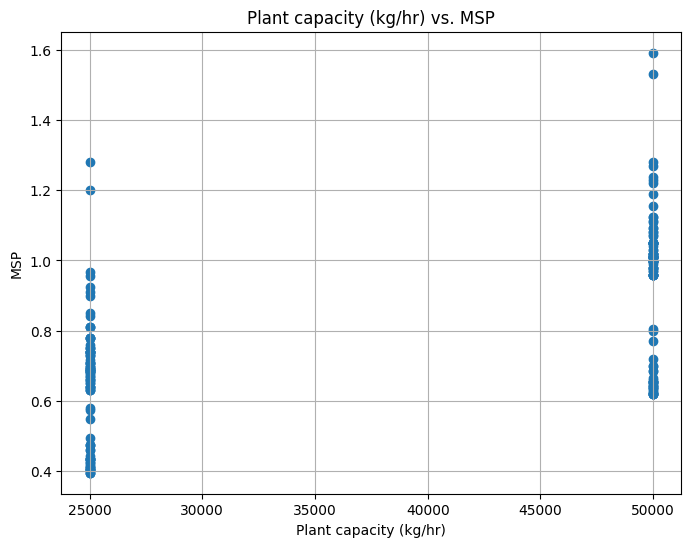

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def create_scatter_plot(file_path, x_column, y_column):
  """Creates a scatter plot for the specified columns in an Excel file.

  Args:
    file_path: The path to the Excel file.
    x_column: The name of the column for the x-axis.
    y_column: The name of the column for the y-axis.
  """

  df = pd.read_excel(file_path)

  plt.figure(figsize=(8, 6))
  plt.scatter(df[x_column], df[y_column])
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title(f"{x_column} vs. {y_column}")
  plt.grid(True)
  plt.show()

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'
# Specify the column names for the x-axis and y-axis
x_column = 'Plant capacity (kg/hr)'  # Replace with your actual column name
y_column = 'MSP'  # Replace with your actual column name

create_scatter_plot(file_path, x_column, y_column)

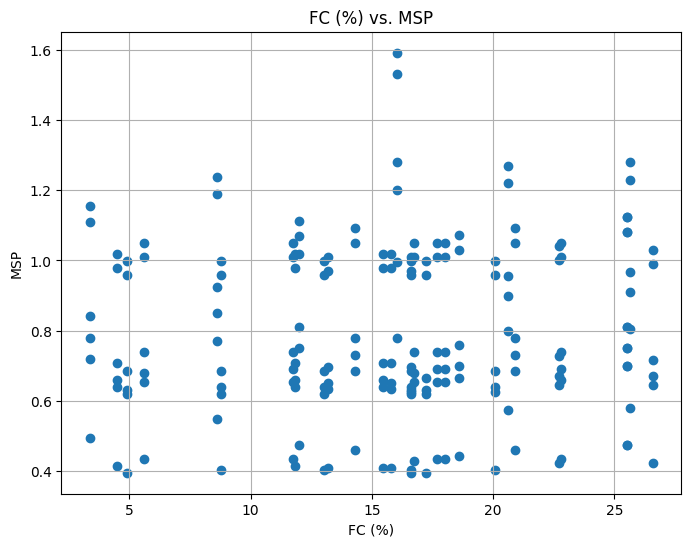

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def create_scatter_plot(file_path, x_column, y_column):
  """Creates a scatter plot for the specified columns in an Excel file.

  Args:
    file_path: The path to the Excel file.
    x_column: The name of the column for the x-axis.
    y_column: The name of the column for the y-axis.
  """

  df = pd.read_excel(file_path)

  plt.figure(figsize=(8, 6))
  plt.scatter(df[x_column], df[y_column])
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title(f"{x_column} vs. {y_column}")
  plt.grid(True)
  plt.show()

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'
# Specify the column names for the x-axis and y-axis
x_column = 'FC (%)'  # Replace with your actual column name
y_column = 'MSP'  # Replace with your actual column name

create_scatter_plot(file_path, x_column, y_column)

In [ ]:
import pandas as pd

def identify_categorical_columns(file_path):
  """Identifies categorical columns in an Excel file based on their data types.

  Args:
    file_path: The path to the Excel file.

  Returns:
    A list of column names that are likely categorical.
  """

  df = pd.read_excel(file_path)

  # Assuming categorical data is typically represented as objects (strings)
  categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

  return categorical_columns

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'
categorical_cols = identify_categorical_columns(file_path)

print("Categorical columns:", categorical_cols)


Categorical columns: ['Location ']


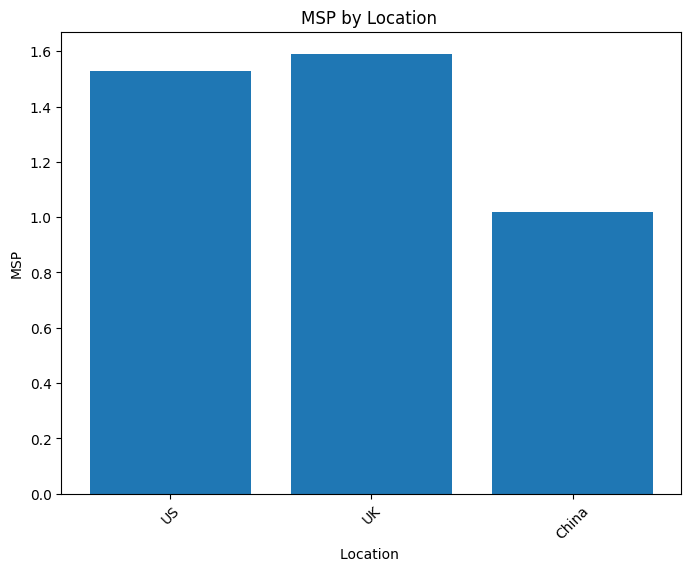

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def create_bar_graph(file_path, x_column, y_column):
  """Creates a bar graph for the specified columns in an Excel file.

  Args:
    file_path: The path to the Excel file.
    x_column: The name of the column for the x-axis (categorical).
    y_column: The name of the column for the y-axis (numerical).
  """

  df = pd.read_excel(file_path)

  plt.figure(figsize=(8, 6))
  plt.bar(df[x_column], df[y_column])
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title(f"{y_column} by {x_column}")
  plt.xticks(rotation=45)  # Rotate x-axis labels if needed
  plt.show()

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'
# Specify the column names for the x-axis and y-axis
x_column = 'Location '  # Replace with your actual column name
y_column = 'MSP'  # Replace with your actual column name

create_bar_graph(file_path, x_column, y_column)

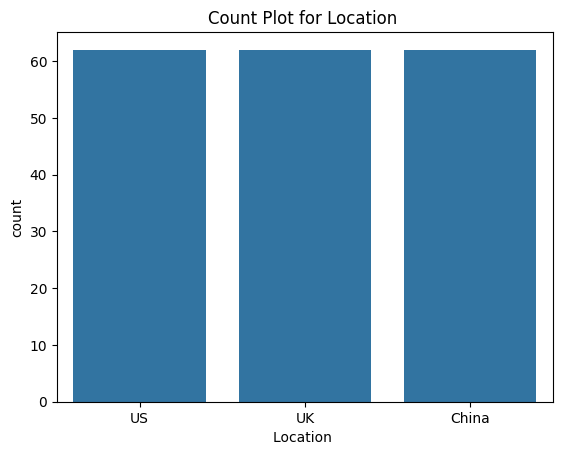

In [ ]:
import pandas as pd
import seaborn as sns

def create_count_graph(file_path, column_name):
  """Creates a count graph for the specified column in an Excel file.

  Args:
    file_path: The path to the Excel file.
    column_name: The name of the column to create the count graph for.
  """

  df = pd.read_excel(file_path)

  sns.countplot(x=column_name, data=df)
  plt.title(f"Count Plot for {column_name}")
  plt.show()

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'
# Specify the column name for the count graph
column_name = 'Location '  # Replace with your actual column name

create_count_graph(file_path, column_name)

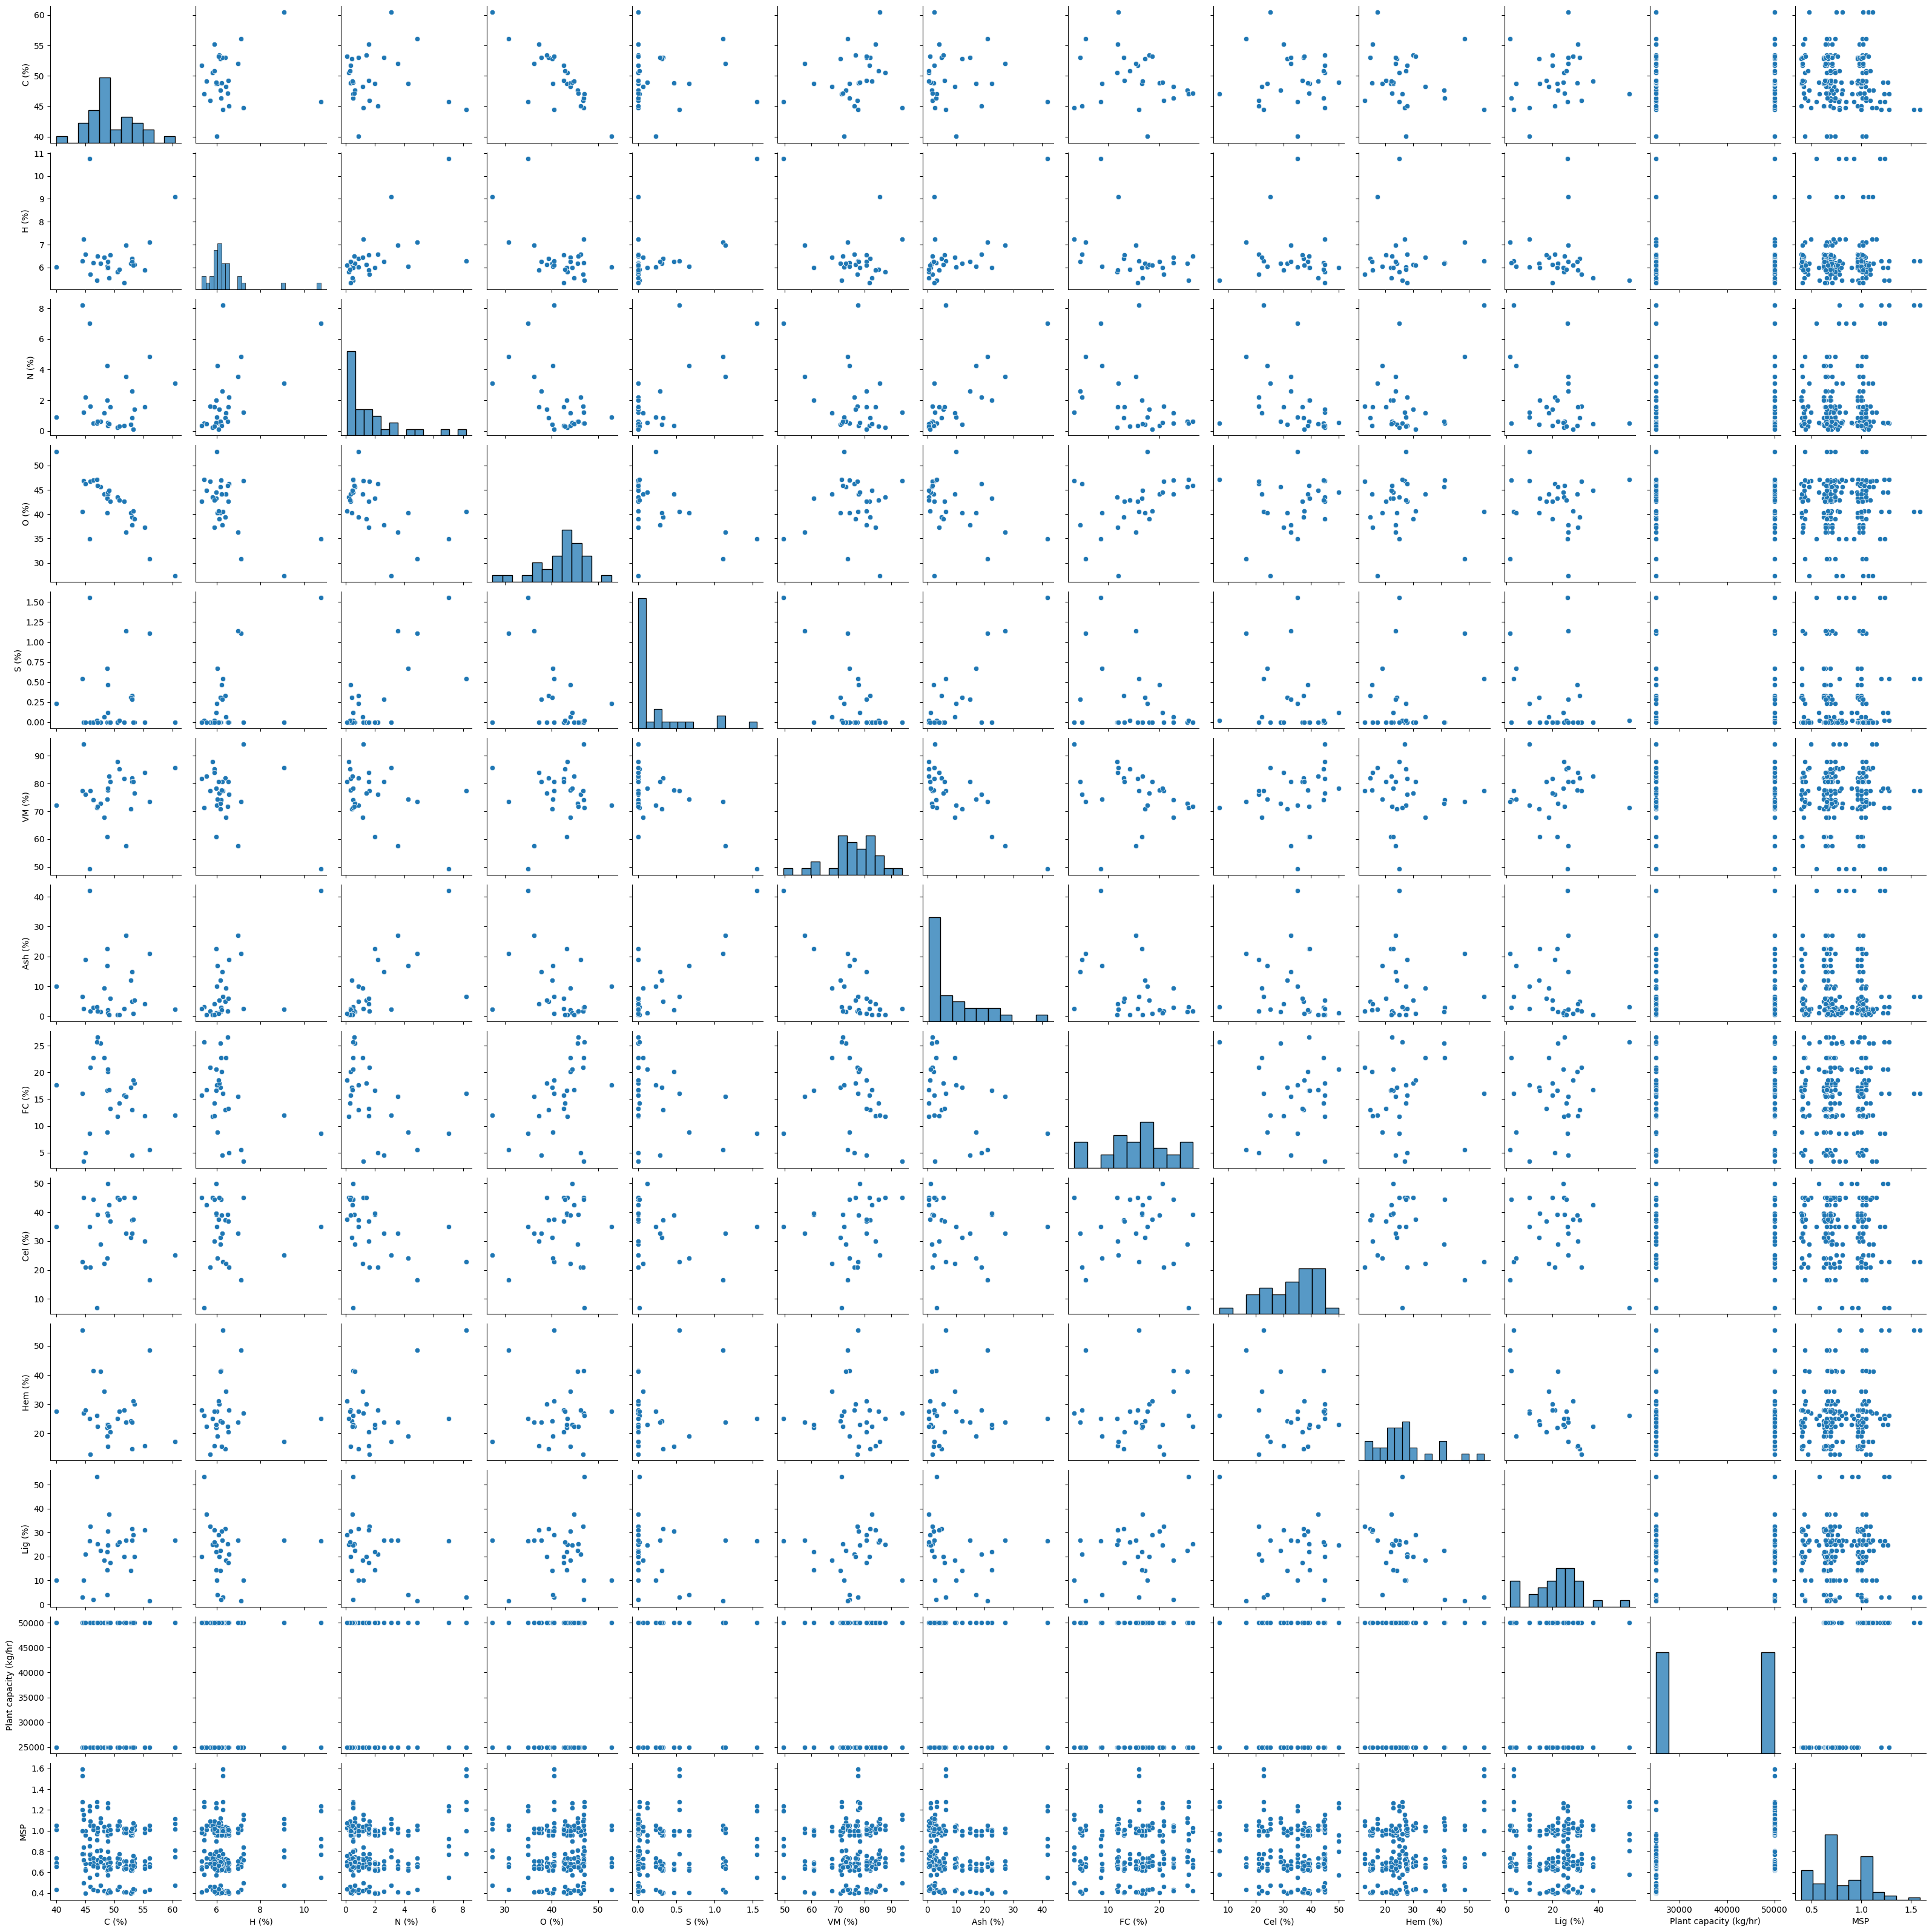

In [ ]:
import pandas as pd
import seaborn as sns

def create_pair_plot(file_path):
  """Creates a pair plot for the specified Excel file.

  Args:
    file_path: The path to the Excel file.
  """

  df = pd.read_excel(file_path)

  sns.pairplot(df)
  plt.show()

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'

create_pair_plot(file_path)

Step 9: Dealing witg Multicollinearity

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def identify_highly_correlated_variables(file_path, threshold=0.8):
  """Identifies highly correlated variables in an Excel file.

  Args:
    file_path: The path to the Excel file.
    threshold: The correlation coefficient threshold for identifying highly correlated variables.

  Returns:
    A list of tuples containing the names of highly correlated variables.
  """

  df = pd.read_excel(file_path)

  # Calculate the correlation matrix only for numeric columns
  correlation_matrix = df.select_dtypes(include=['number']).corr()

  # Find pairs of variables with a correlation coefficient above the threshold
  correlated_pairs = []
  for i in range(len(correlation_matrix)):
    for j in range(i+1, len(correlation_matrix)):
      if abs(correlation_matrix.iloc[i, j]) >= threshold:
        correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

  return correlated_pairs

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'
# Set the correlation threshold
threshold = 0.8

highly_correlated_pairs = identify_highly_correlated_variables(file_path, threshold)

print("Highly correlated variables:")
for pair in highly_correlated_pairs:
  print(pair)

Highly correlated variables:
('C (%)', 'O (%)')


In [ ]:
import pandas as pd

def drop_variable(file_path, variable_name):
  """Drops a specified variable from an Excel file.

  Args:
    file_path: The path to the Excel file.
    variable_name: The name of the variable to drop.
  """

  df = pd.read_excel(file_path)
  df = df.drop(columns=variable_name)
  df.to_excel(file_path, index=False)

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'
variable_to_drop = 'C (%)'

drop_variable(file_path, variable_to_drop)

In [ ]:
import pandas as pd

def print_dataset(file_path):
  """Prints the dataset from the specified Excel file.

  Args:
    file_path: The path to the Excel file.
  """

  df = pd.read_excel(file_path)
  print(df)

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'

print_dataset(file_path)

         H (%)     N (%)      O (%)     S (%)     VM (%)    Ash (%)  \
0     6.390897  0.871969  39.366227  0.329647  82.070081   4.884097   
1     6.186584  0.436866  40.219842  0.310034  70.783562  12.000000   
2     6.010000  0.880000  52.860000  0.230000  72.294705  10.020831   
3    10.762332  7.036909  34.908589  1.552259  49.357766  42.020000   
4     6.280000  8.210000  40.490000  0.540000  77.497780   6.472025   
..         ...       ...        ...       ...        ...        ...   
181   5.904724  0.300240  42.934347  0.020016  85.300000   0.400000   
182   6.979295  3.551351  36.295077  1.138078  57.460000  27.070000   
183   6.100000  0.100000  40.600000  0.000000  80.600000   0.800000   
184   5.890589  1.580158  37.293729  0.000000  84.041451   4.124352   
185   9.080000  3.100000  27.360000  0.000000  85.683987   2.332980   

        FC (%)    Cel (%)    Hem (%)    Lig (%) Location   \
0    13.045822  37.260000  14.620000  31.680000        US   
1    17.216438  31.300000

Step 10: Final thoughts

In [ ]:
# prompt: write code to determine significance of the variables(R^2)

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def calculate_r_squared(file_path, target_variable):
  """Calculates the R-squared value for each predictor variable in relation to the target variable.

  Args:
    file_path: The path to the Excel file.
    target_variable: The name of the target variable.

  Returns:
    A dictionary where keys are predictor variable names and values are their corresponding R-squared values.
  """

  df = pd.read_excel(file_path)

  # Separate the target variable from the predictor variables
  X = df.drop(columns=[target_variable])
  y = df[target_variable]

  # Convert non-numeric columns to numeric if possible
  for col in X.columns:
    try:
      X[col] = pd.to_numeric(X[col])
    except ValueError:
      print(f"Column {col} could not be converted to numeric and will be excluded from analysis.")
      X = X.drop(col, axis=1)

  # Create a dictionary to store R-squared values
  r_squared_values = {}

  # Loop through each predictor variable
  for predictor_variable in X.columns:
    # Create a new DataFrame with only the current predictor variable
    X_single = X[[predictor_variable]]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the R-squared value
    r_squared = r2_score(y_test, y_pred)

    # Store the R-squared value in the dictionary
    r_squared_values[predictor_variable] = r_squared

  return r_squared_values

# Replace '/content/SAF Dataset.xlsx' with the actual path to your file
file_path = '/content/SAF Dataset.xlsx'
target_variable = 'MSP'  # Replace with your actual target variable name

r_squared_results = calculate_r_squared(file_path, target_variable)

print("R-squared values for each predictor variable:")
for variable, r_squared in r_squared_results.items():
  print(f"{variable}: {r_squared}")


Column Location  could not be converted to numeric and will be excluded from analysis.
R-squared values for each predictor variable:
C (%): 0.005379386375597428
H (%): -0.036639707603475014
N (%): 0.06334522707065005
O (%): -0.008444425206090678
S (%): -0.0012720785733906226
VM (%): -0.014167675369456179
Ash (%): -0.019585392436315407
FC (%): -0.008476012885525908
Cel (%): 5.381009095306588e-06
Hem (%): 0.07273178127250912
Lig (%): -0.008210707486485447
Plant capacity (kg/hr): 0.2644360434875648


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Make sure the filename is correct and the file exists in the directory
data = pd.read_csv('/content/SAF Dataset.xlsx') # Changed the filename to 'cleaned_data.csv'

# Exploratory Data Analysis (EDA)

# 1. Summary statistics
print(data.describe())

# 2. Correlation analysis
# Convert columns with 'US' to numeric type before calculating correlation
for col in data.columns:
    if data[col].dtype == 'object':  # Check if column is of object type
        try:
            # Attempt to convert to numeric, handling commas and 'US' if present
            data[col] = pd.to_numeric(data[col].str.replace(',', '.').str.replace('US', '', regex=True))  # Added regex=True for consistent replacement
        except:
            print(f"Could not convert column {col} to numeric. This column will be excluded from correlation analysis.")

# Check for any remaining non-numeric values and replace with NaN
data = data.replace('US', '', regex=True).replace('', pd.NA, regex=True) # Added a step to remove any remaining 'US' values

# Convert all columns to numeric type, coercing errors to NaN
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

# 3. Pair plots
sns.pairplot(data)
plt.show()

# 4. Distribution plots
for column in data:
    sns.histplot(data[column])
    plt.title(f'Distribution of {column}')
    plt.show()

# Identify key variables
important_variables = []

# Based on correlation analysis
# Make sure the column name 'MSP' is correct
strong_correlations = correlation_matrix['MSP'][(correlation_matrix['MSP'] > 0.7) | (correlation_matrix['MSP'] < -0.7)]
important_variables.extend(strong_correlations.index)

# Based on feature importance (if using machine learning models)
# ... (add code for feature importance calculation)

# Summarize key insights
print("Key insights:")
print("- **Strong correlations:**", strong_correlations)
print("- **Important variables:**", important_variables)
print("- **Other observations:** (based on EDA results)")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 14: invalid start byte

            C (%)       H (%)       N (%)       O (%)       S (%)      VM (%)  \
count  186.000000  186.000000  186.000000  186.000000  186.000000  186.000000   
mean    49.506202    6.418846    1.793219   42.060283    0.221450   75.465442   
std      4.002631    1.037071    1.949253    5.059810    0.392152    9.172079   
min     40.020000    5.320000    0.100000   27.360000    0.000000   49.357766   
25%     47.014626    5.980000    0.490884   39.366227    0.000000   71.700000   
50%     48.867116    6.174469    1.171271   43.280000    0.000000   76.555556   
75%     52.846674    6.500000    2.189781   45.557022    0.310034   81.797235   
max     60.460000   10.762332    8.210000   52.860000    1.552259   94.161220   

          Ash (%)      FC (%)     Cel (%)     Hem (%)     Lig (%)  \
count  186.000000  186.000000  186.000000  186.000000  186.000000   
mean     8.694476   15.840234   33.685306   26.992285   21.840139   
std      9.878574    6.382265    9.955842    9.737054   10.9847

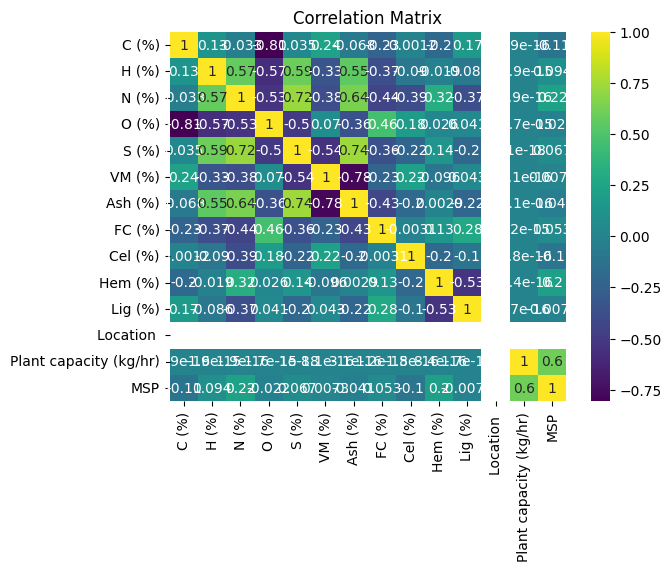

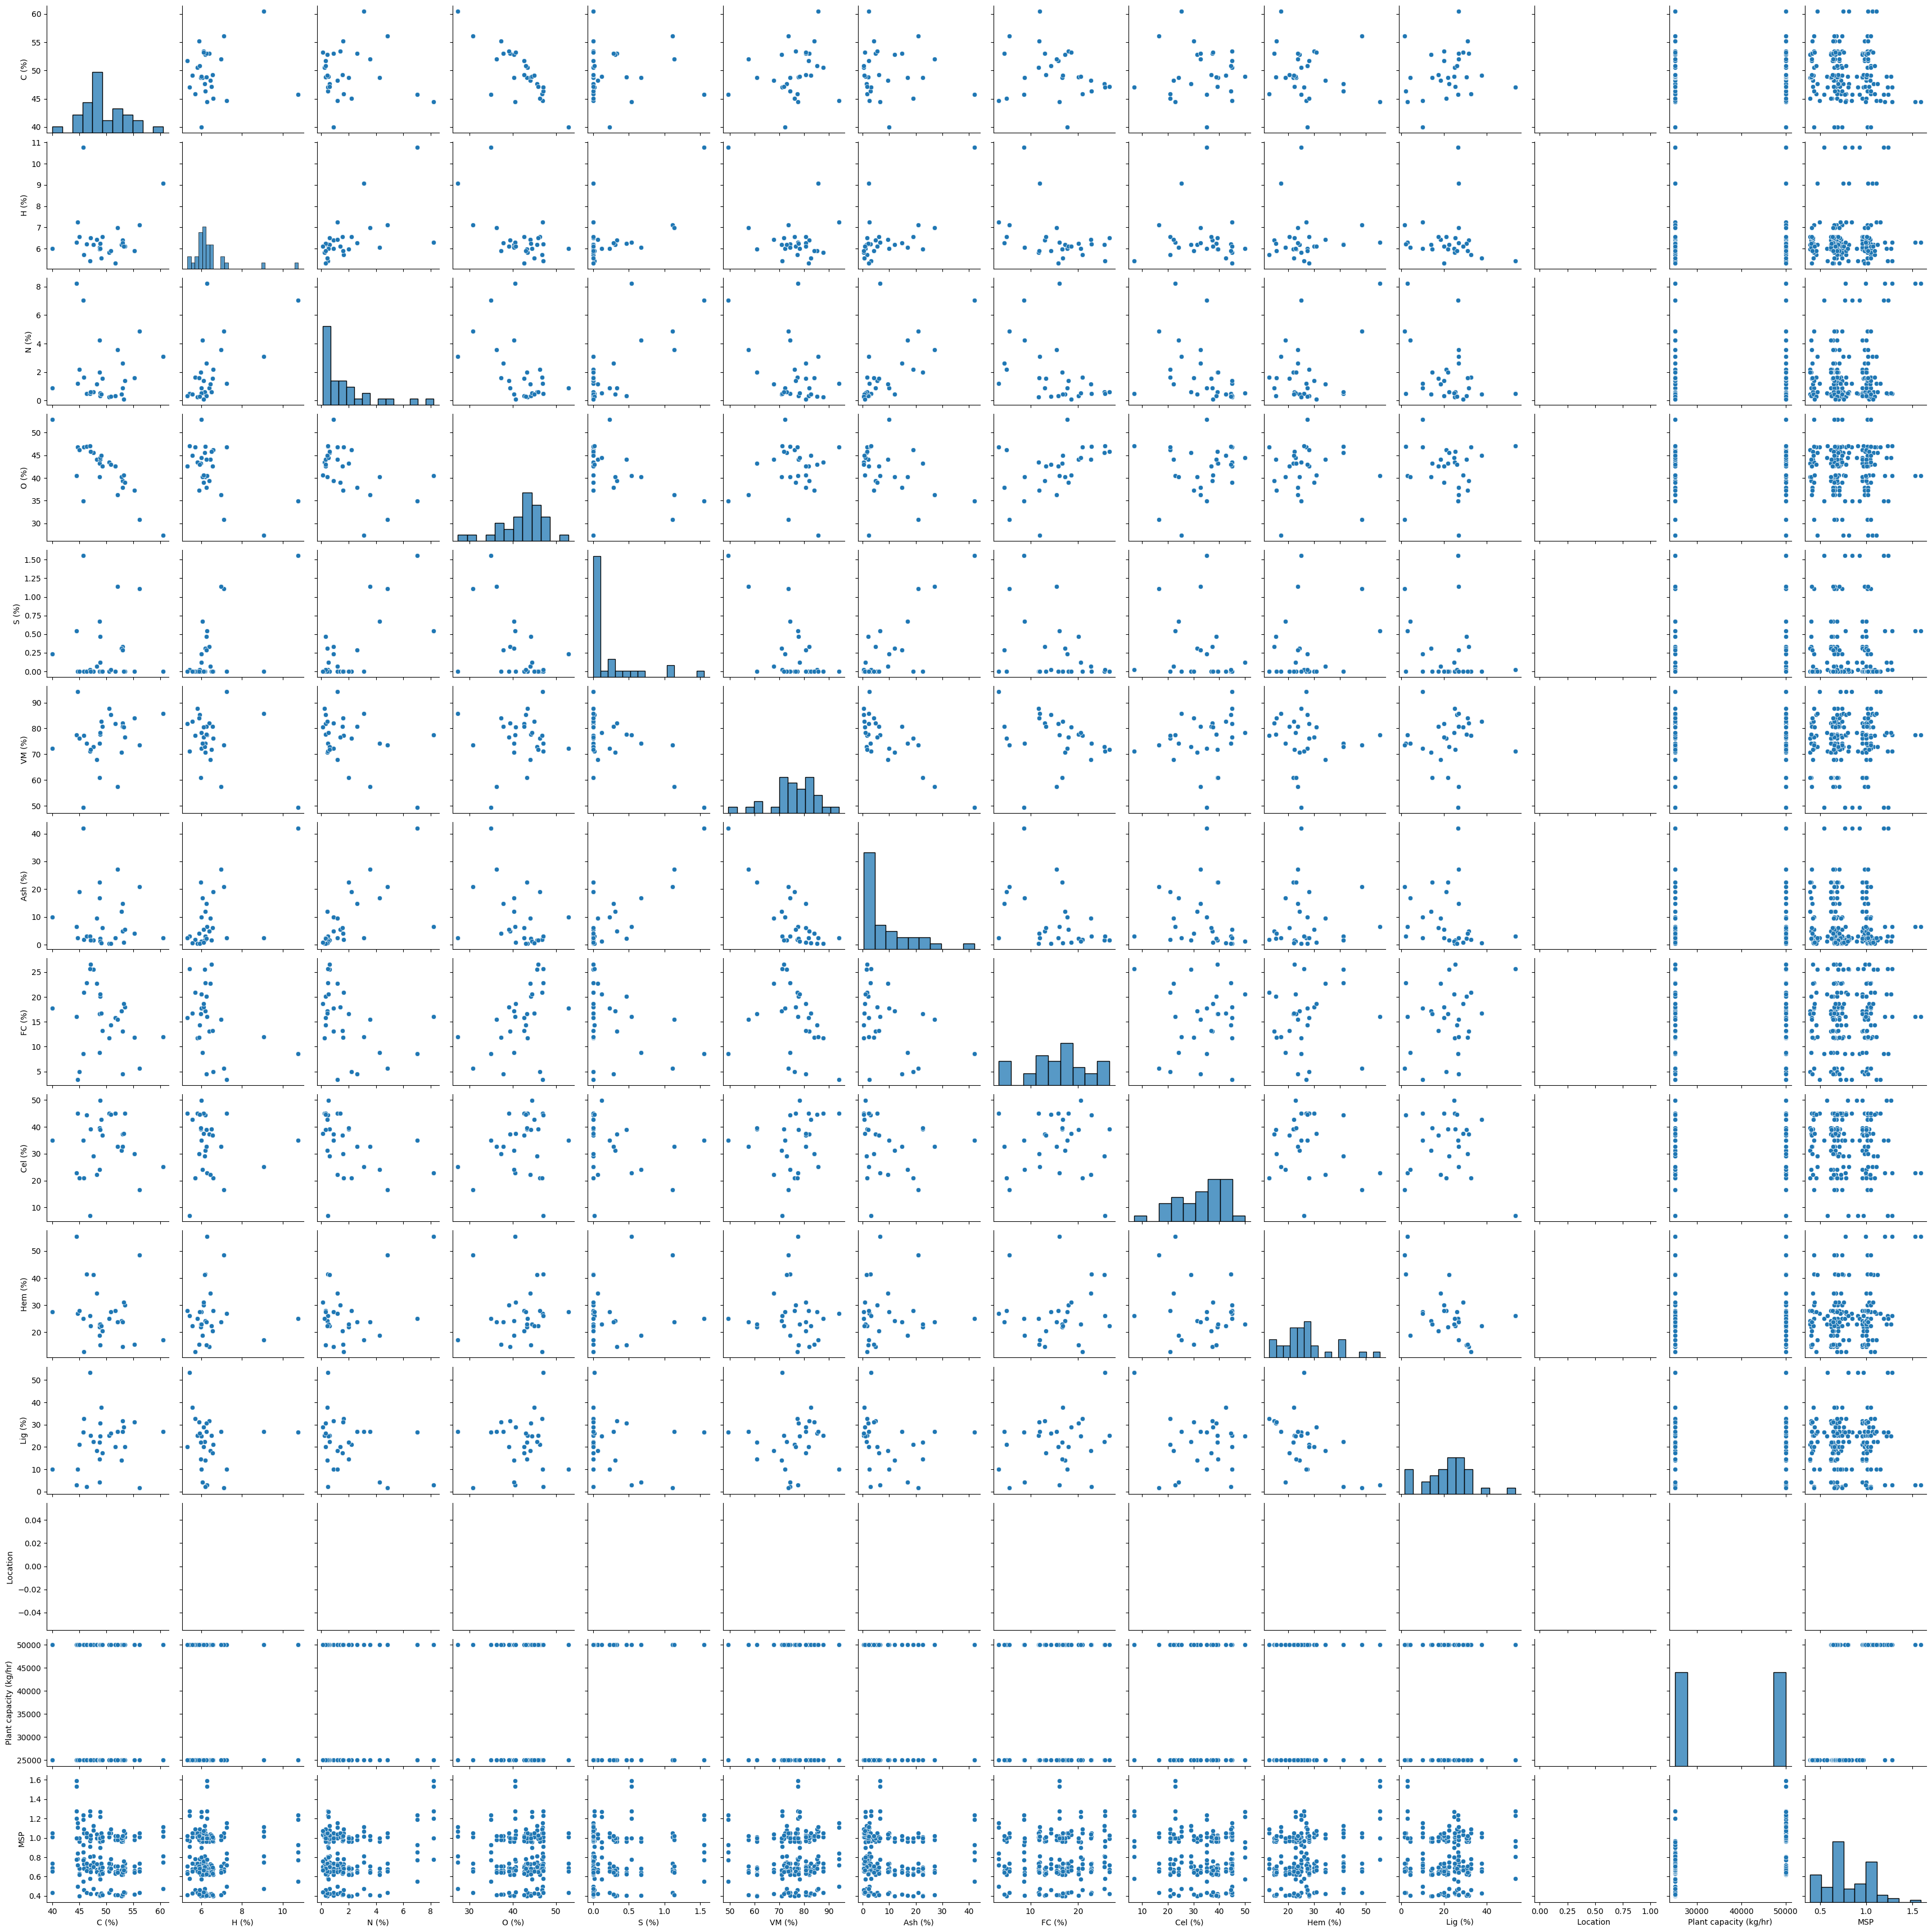

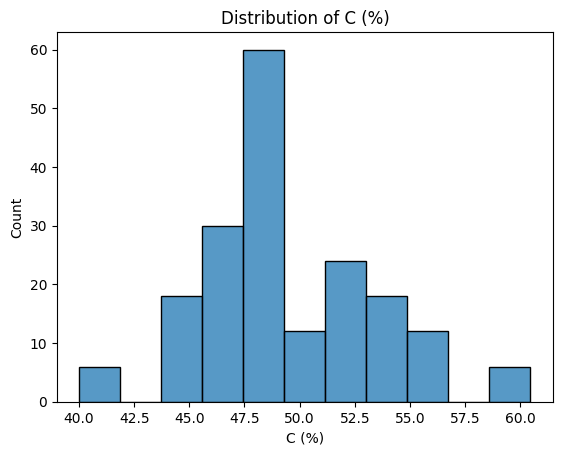

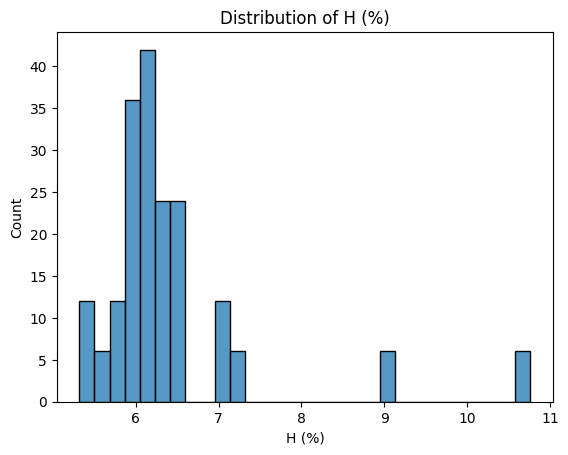

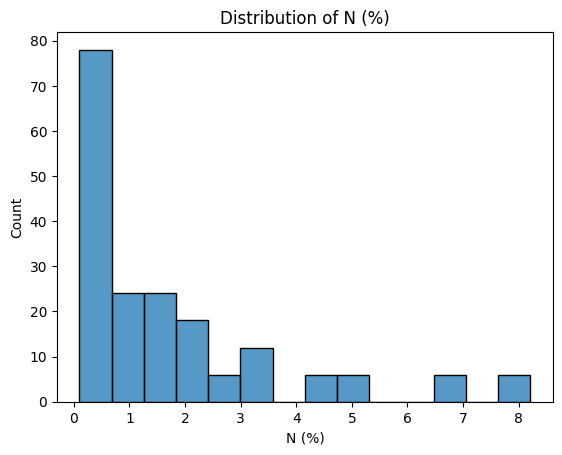

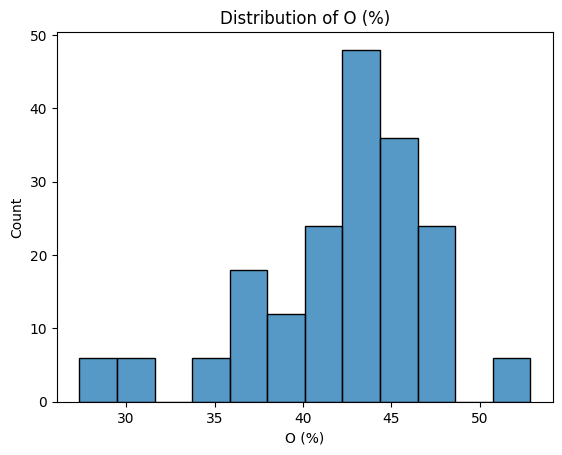

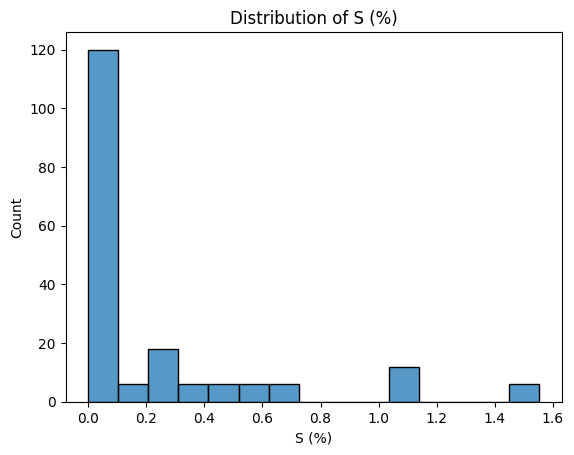

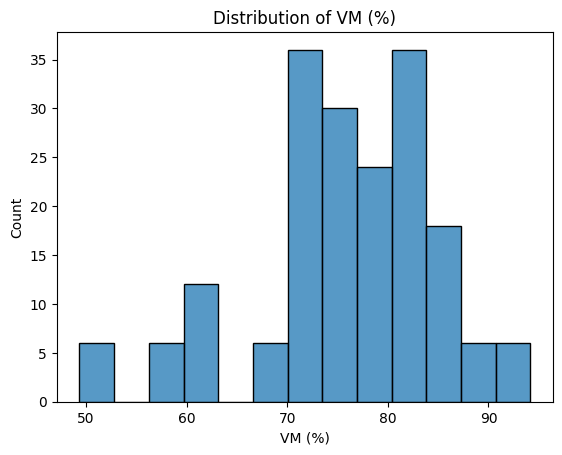

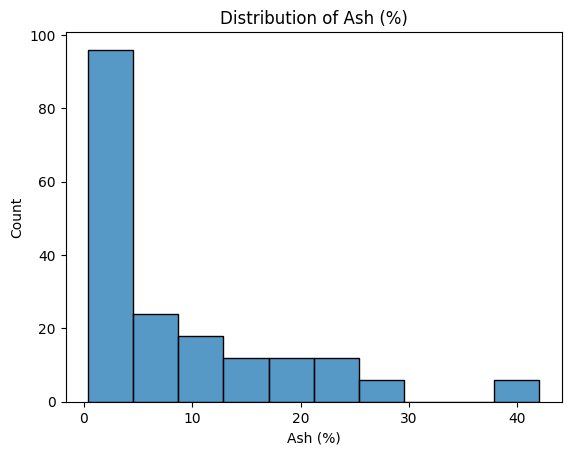

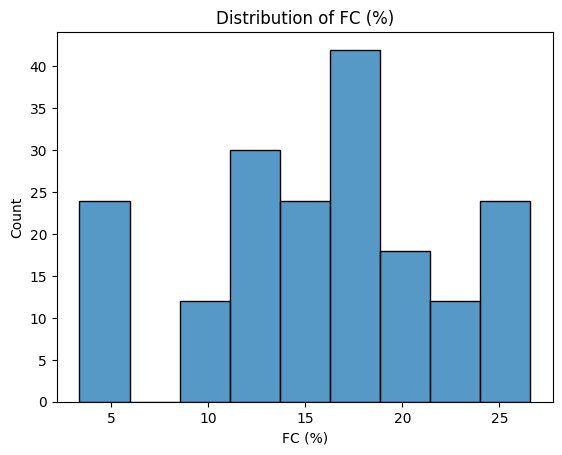

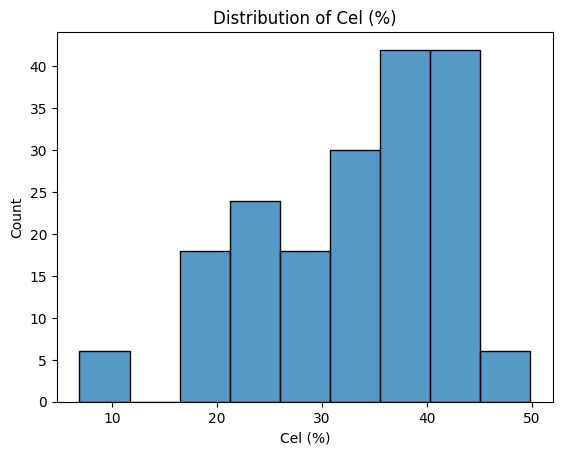

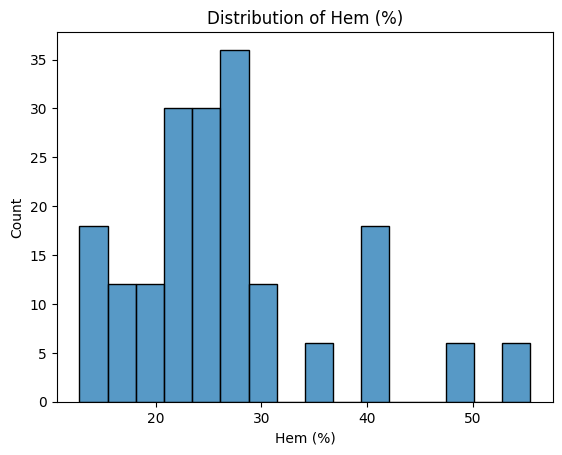

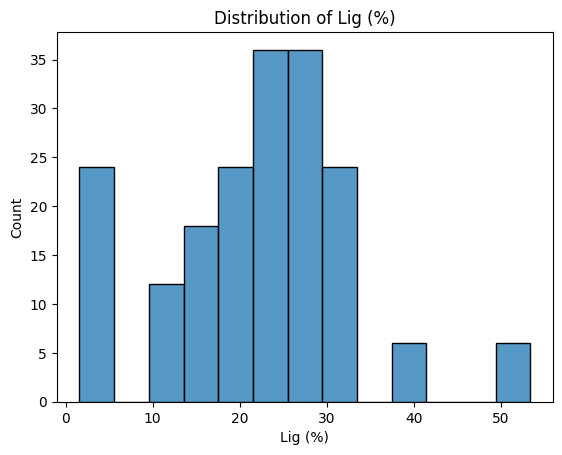

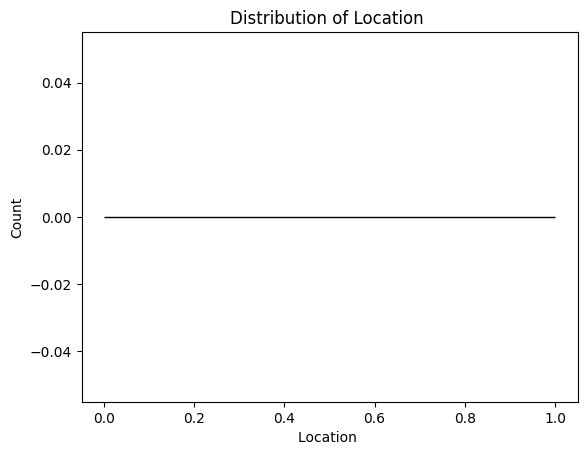

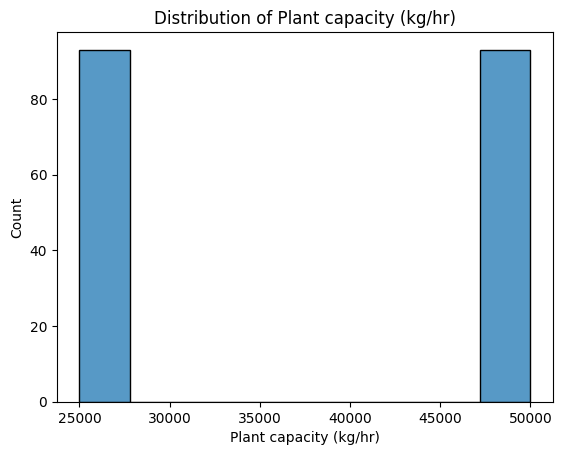

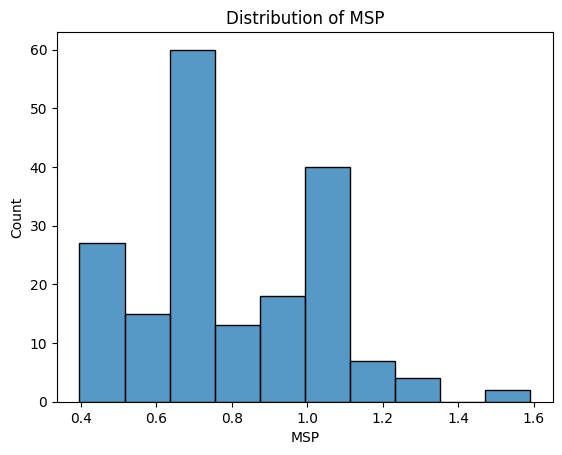

Key insights:
- **Strong correlations:** MSP    1.0
Name: MSP, dtype: float64
- **Important variables:** ['MSP']
- **Other observations:** (based on EDA results)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Use pd.read_excel to read Excel files and specify the encoding
data = pd.read_excel('/content/SAF Dataset.xlsx', engine='openpyxl') # Use openpyxl engine for .xlsx files

# Exploratory Data Analysis (EDA)

# 1. Summary statistics
print(data.describe())

# 2. Correlation analysis
# Convert columns with 'US' to numeric type before calculating correlation
for col in data.columns:
    if data[col].dtype == 'object':  # Check if column is of object type
        try:
            # Attempt to convert to numeric, handling commas and 'US' if present
            data[col] = pd.to_numeric(data[col].str.replace(',', '.').str.replace('US', '', regex=True))  # Added regex=True for consistent replacement
        except:
            print(f"Could not convert column {col} to numeric. This column will be excluded from correlation analysis.")

# Check for any remaining non-numeric values and replace with NaN
data = data.replace('US', '', regex=True).replace('', pd.NA, regex=True) # Added a step to remove any remaining 'US' values

# Convert all columns to numeric type, coercing errors to NaN
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

# 3. Pair plots
sns.pairplot(data)
plt.show()

# 4. Distribution plots
for column in data:
    sns.histplot(data[column])
    plt.title(f'Distribution of {column}')
    plt.show()

# Identify key variables
important_variables = []

# Based on correlation analysis
# Make sure the column name 'MSP' is correct
strong_correlations = correlation_matrix['MSP'][(correlation_matrix['MSP'] > 0.7) | (correlation_matrix['MSP'] < -0.7)]
important_variables.extend(strong_correlations.index)

# Based on feature importance (if using machine learning models)
# ... (add code for feature importance calculation)

# Summarize key insights
print("Key insights:")
print("- **Strong correlations:**", strong_correlations)
print("- **Important variables:**", important_variables)
print("- **Other observations:** (based on EDA results)")

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("/content/SAF Dataset.xlsx")

# Explore the data
print(data.head())
print(data.describe())

# Check for correlations - Excluding non-numeric columns
correlation_matrix = data.select_dtypes(include=['number']).corr() # Select only numeric columns for correlation calculation
print(correlation_matrix)

# Visualize correlations
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()

# Identify strong correlations
strong_correlations = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]
print("Strong Correlations:")
print(strong_correlations)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 14: invalid start byte

       C (%)      H (%)     N (%)      O (%)     S (%)     VM (%)    Ash (%)  \
0  53.041259   6.390897  0.871969  39.366227  0.329647  82.070081   4.884097   
1  52.846674   6.186584  0.436866  40.219842  0.310034  70.783562  12.000000   
2  40.020000   6.010000  0.880000  52.860000  0.230000  72.294705  10.020831   
3  45.739910  10.762332  7.036909  34.908589  1.552259  49.357766  42.020000   
4  44.480000   6.280000  8.210000  40.490000  0.540000  77.497780   6.472025   

      FC (%)    Cel (%)    Hem (%)    Lig (%) Location   \
0  13.045822  37.260000  14.620000  31.680000        US   
1  17.216438  31.300000  24.300000  14.100000        US   
2  17.684464  35.000000  27.500000  10.000000        US   
3   8.626970  35.000000  25.000000  26.500000        US   
4  16.030195  22.775726  55.419525   2.955145        US   

   Plant capacity (kg/hr)   MSP  
0                   25000  0.64  
1                   25000  0.63  
2                   25000  0.69  
3                   25000  0

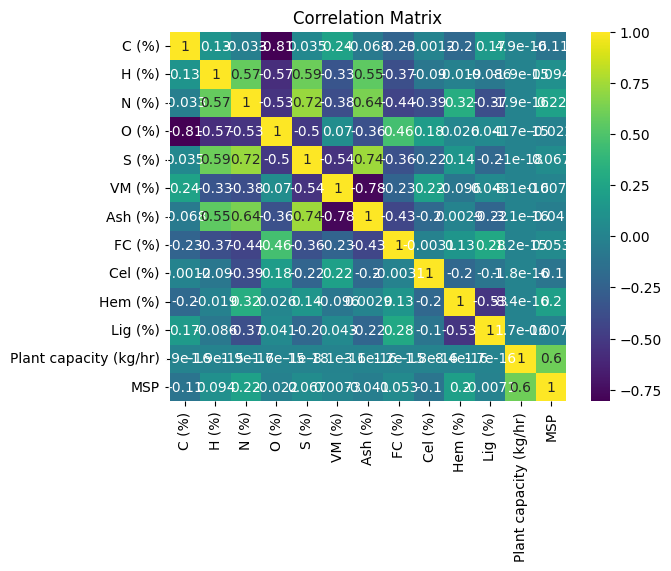

Strong Correlations:
                           C (%)  H (%)    N (%)     O (%)     S (%)  \
C (%)                   1.000000    NaN      NaN -0.807065       NaN   
H (%)                        NaN    1.0      NaN       NaN       NaN   
N (%)                        NaN    NaN  1.00000       NaN  0.722180   
O (%)                  -0.807065    NaN      NaN  1.000000       NaN   
S (%)                        NaN    NaN  0.72218       NaN  1.000000   
VM (%)                       NaN    NaN      NaN       NaN       NaN   
Ash (%)                      NaN    NaN      NaN       NaN  0.737537   
FC (%)                       NaN    NaN      NaN       NaN       NaN   
Cel (%)                      NaN    NaN      NaN       NaN       NaN   
Hem (%)                      NaN    NaN      NaN       NaN       NaN   
Lig (%)                      NaN    NaN      NaN       NaN       NaN   
Plant capacity (kg/hr)       NaN    NaN      NaN       NaN       NaN   
MSP                          NaN    NaN    

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# Use pd.read_excel to read Excel files and specify the encoding
data = pd.read_excel("/content/SAF Dataset.xlsx", engine='openpyxl') # Use openpyxl engine for .xlsx files

# Explore the data
print(data.head())
print(data.describe())

# Check for correlations - Excluding non-numeric columns
correlation_matrix = data.select_dtypes(include=['number']).corr() # Select only numeric columns for correlation calculation
print(correlation_matrix)

# Visualize correlations
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()

# Identify strong correlations
strong_correlations = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]
print("Strong Correlations:")
print(strong_correlations)

Summary of EDA:

The most important variables present when determining MSP and SAF are HEM (%), C (%), & N (%) .  This was determined by looking at their calculated R^2 value. When looking at all the data on the box plots it was apparent that there were outliers in the data. In order to rectify that I did a calculation using the inner quartile range. However, some of the outliers are still present due to the limits of the range. See code above to justify relationship and patterns.
